In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import pprint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import scorecardpy as sc

## 1. Data Preparation

In [36]:
proj_data = pd.read_csv('application_data.csv')
proj_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Dropping Columns


In [37]:
columns_dropped = ['SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','CNT_CHILDREN','NAME_TYPE_SUITE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
# processed_data = proj_data.copy()
processed_data = proj_data.drop(columns_dropped, axis=1)
processed_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Data Cleaning

#### Reformat DAYS_BIRTH to AGE

In [38]:
# Data Cleaning
# Check for null values
processed_data['AGE'] = processed_data['DAYS_BIRTH']/-365
processed_data['AGE'] = processed_data['AGE'].astype(int)


### Filling NA Data

In [39]:
numerical_cols = processed_data.select_dtypes(include=['float', 'int']).columns
processed_data[numerical_cols] = processed_data[numerical_cols].fillna(processed_data[numerical_cols].median())
processed_data.fillna('Missing', inplace=True)
processed_data.describe()


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.487841     5.383163e+05   
std    4.024908e+05   14493.461065     3.692890e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000   
mean           0.000595          0.000507          0.000335   
std            0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               307511.000000              307511.000000   
mean                     0.005538                   0.006055   
std                      0.078014                   0.103037   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               307511.000000              307511.000000   
mean                     0.029723                   0.231293   
std                      0.190728                   0.856810   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR            AGE  
count              307511.000000               307511.000000  307511.000000  
mean                    0.229631                    1.778463      43.435968  
std                     0.744059                    1.765523      11.954593  
min                     0.000000                    0.000000      20.000000  
25%                     0.000000                    1.000000      34.000000  
50%                     0.

In [40]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 123 entries, SK_ID_CURR to AGE
dtypes: float64(65), int32(1), int64(41), object(16)
memory usage: 287.4+ MB


### Filter By Self-Employed

In [41]:
filtered_data = processed_data[processed_data['ORGANIZATION_TYPE'] == 'Self-employed']
filtered_data.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count   38412.000000  38412.000000  38412.000000      3.841200e+04   
mean   278947.616396      0.101739      0.508851      1.674424e+05   
std    103118.225412      0.302309      0.763755      9.429796e+04   
min    100017.000000      0.000000      0.000000      2.700000e+04   
25%    189191.750000      0.000000      0.000000      1.125000e+05   
50%    279612.000000      0.000000      0.000000      1.485000e+05   
75%    368781.250000      0.000000      1.000000      2.025000e+05   
max    456248.000000      1.000000     14.000000      4.500000e+06   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.841200e+04   38412.000000     3.841200e+04   
mean   5.890418e+05   27807.360708     5.278394e+05   
std    3.769039e+05   14312.110682     3.441923e+05   
min    4.500000e+04    2317.500000     4.050000e+04   
25%    2.710665e+05   17167.500000     2.430000e+05   
50%    5.123385e+05   26086.500000     4.500000e+05   
75%    8.086500e+05   35617.500000     6.795000e+05   
max    2.695500e+06  225000.000000     2.475000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count                38412.000000  38412.000000   38412.000000  ...   
mean                     0.018959 -14547.136832   -1957.712199  ...   
std                      0.011526   3419.030343    1536.577092  ...   
min                      0.000533 -25168.000000  -16360.000000  ...   
25%                      0.009334 -17115.000000   -2726.000000  ...   
50%                      0.018634 -14382.000000   -1575.000000  ...   
75%                      0.026392 -11770.750000    -823.000000  ...   
max                      0.072508  -7489.000000       0.000000  ...   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count      38412.000000      38412.000000      38412.000000   
mean           0.000937          0.000286          0.000260   
std            0.030600          0.016920          0.016133   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                38412.000000               38412.000000   
mean                     0.005024                   0.005363   
std                      0.072524                   0.089966   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      2.000000                   5.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                38412.000000               38412.000000   
mean                     0.028715                   0.181922   
std                      0.185752                   0.689533   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      6.000000                  19.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR           AGE  
count               38412.000000                38412.000000  38412.000000  
mean                    0.233963                    1.852104     39.355878  
std                     0.581007                    1.769419      9.366335  
min                     0.000000                    0.000000     20.000000  
25%                     0.000000                    1.000000     32.000000  
50%                     0.000000                    1.00000

### Export To CSV

In [42]:
# filtered_data.to_csv("processed_data.csv")

### Calculating IVs for all columns



In [43]:
bins = sc.woebin(filtered_data,y='TARGET')

[INFO] creating woe binning ...
Binning on 38412 rows and 120 columns in 00:01:02


{'AMT_REQ_CREDIT_BUREAU_WEEK': <Figure size 640x480 with 2 Axes>,
 'LIVINGAREA_AVG': <Figure size 640x480 with 2 Axes>,
 'REG_REGION_NOT_WORK_REGION': <Figure size 640x480 with 2 Axes>,
 'AMT_REQ_CREDIT_BUREAU_HOUR': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'AMT_GOODS_PRICE': <Figure size 640x480 with 2 Axes>,
 'REG_CITY_NOT_LIVE_CITY': <Figure size 640x480 with 2 Axes>,
 'FLAG_DOCUMENT_7': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_3': <Figure size 640x480 with 2 Axes>,
 'DEF_60_CNT_SOCIAL_CIRCLE': <Figure size 640x480 with 2 Axes>,
 'OBS_60_CNT_SOCIAL_CIRCLE': <Figure size 640x480 with 2 Axes>,
 'LIVINGAPARTMENTS_MODE': <Figure size 640x480 with 2 Axes>,
 'FLAG_WORK_PHONE': <Figure size 640x480 with 2 Axes>,
 'AMT_REQ_CREDIT_BUREAU_YEAR': <Figure size 640x480 with 2 Axes>,
 'FLAG_DOCUMENT_11': <Figure size 640x480 with 2 Axes>,
 'FONDKAPREMONT_MODE': <Figure size 640x480 with 2 Axes>,
 'NONLIVINGAREA_MODE': <Figure size 640x4

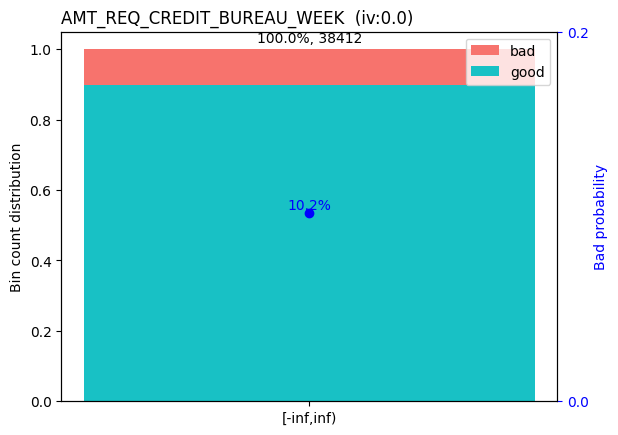

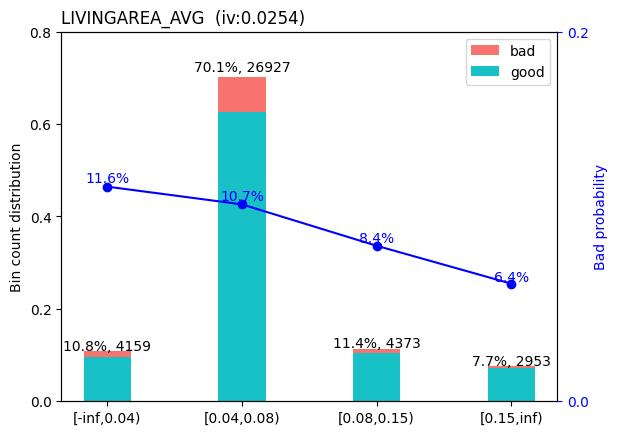

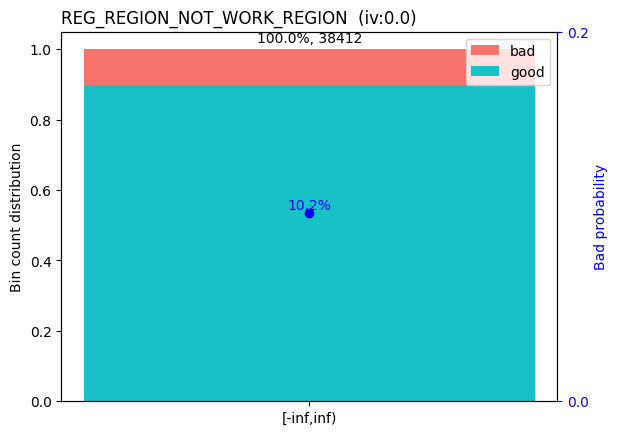

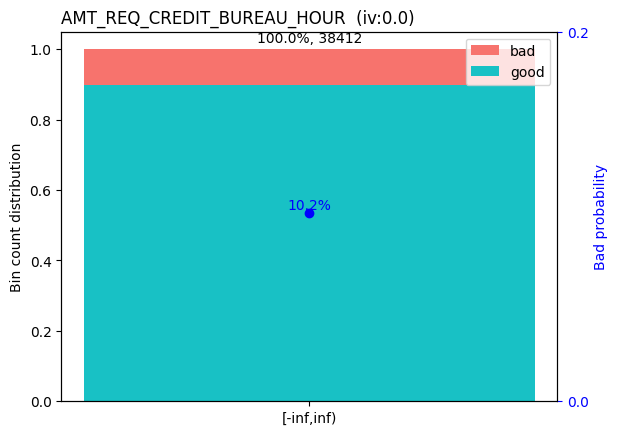

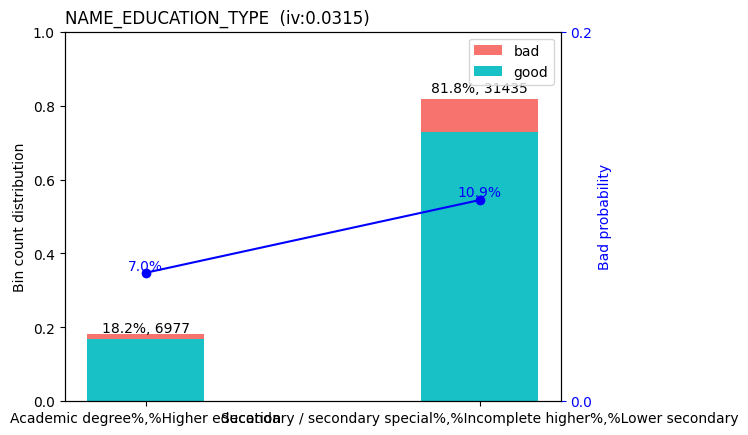

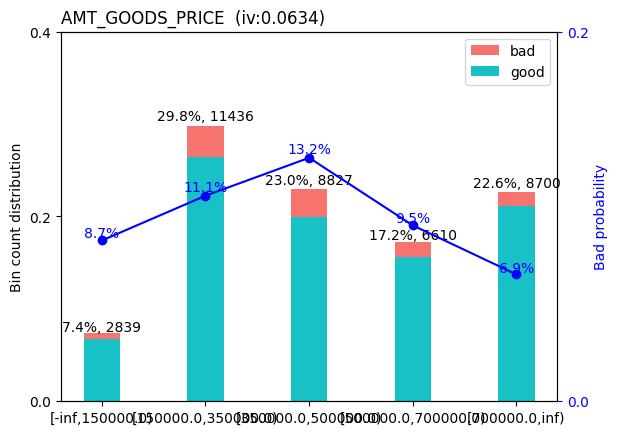

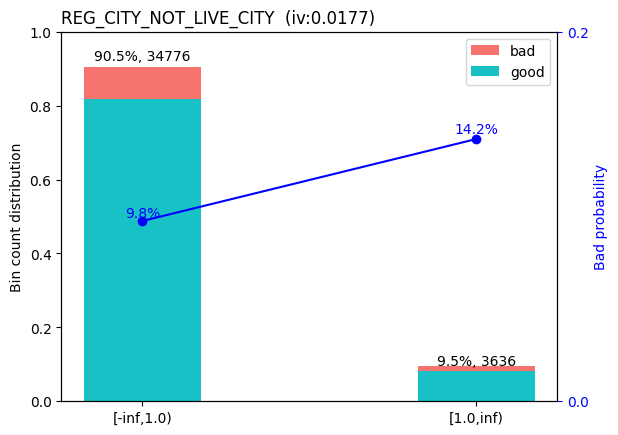

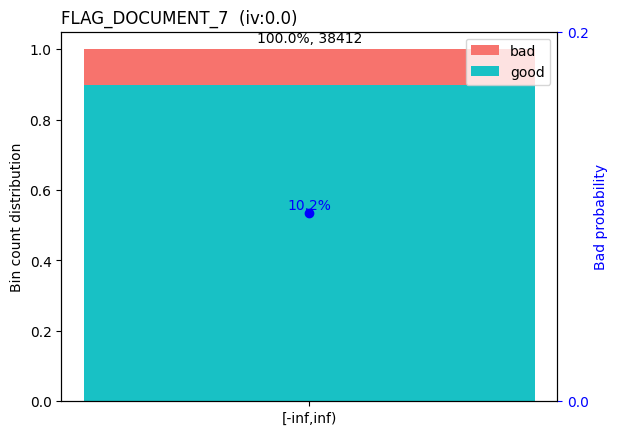

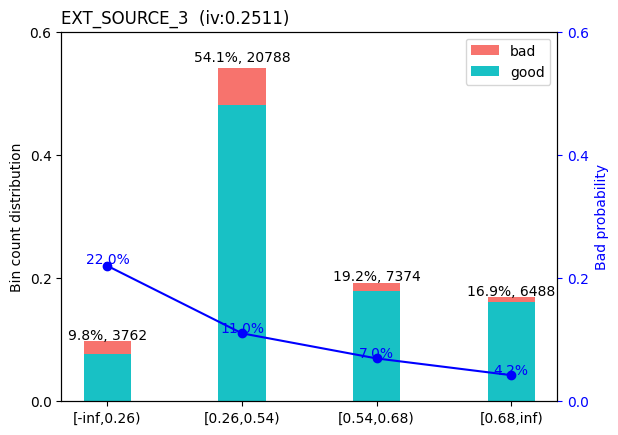

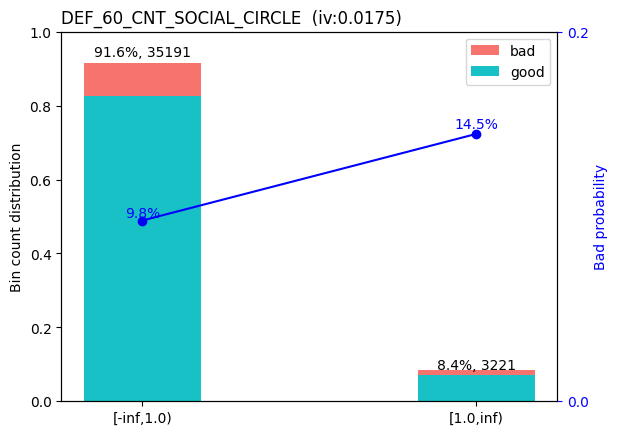

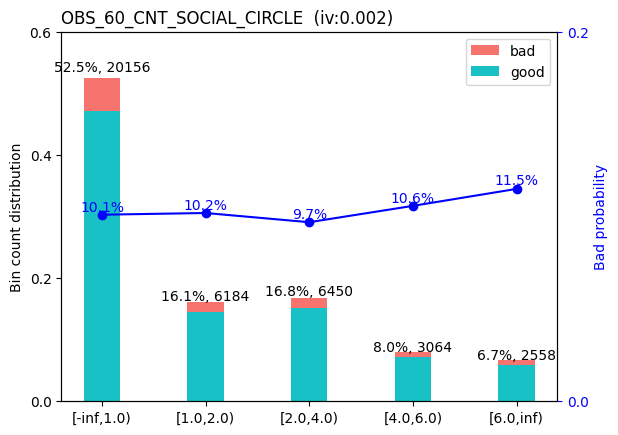

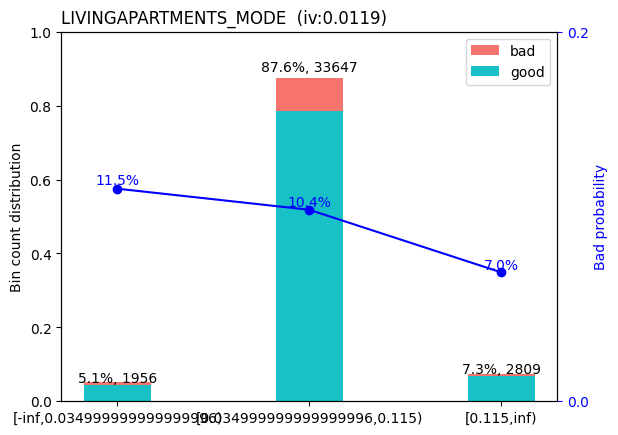

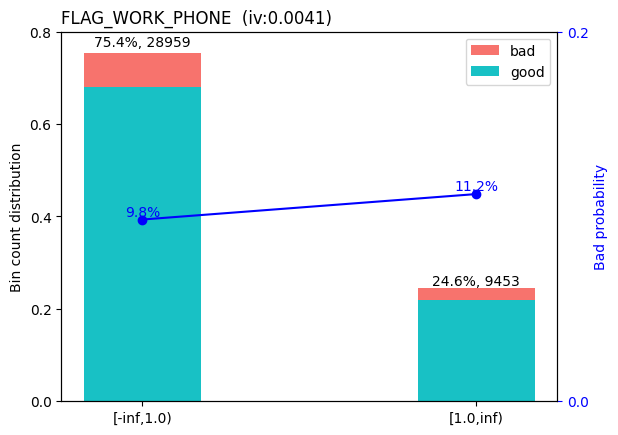

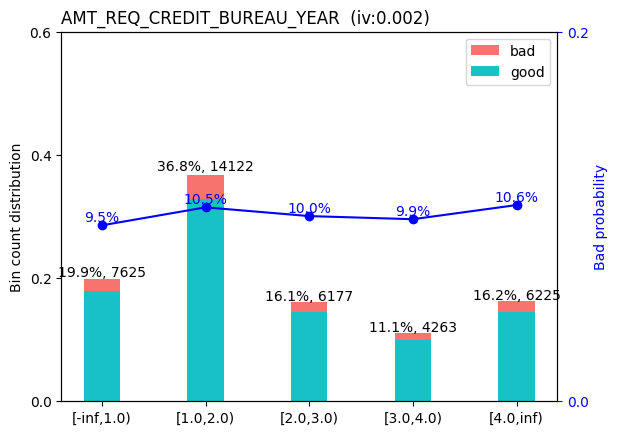

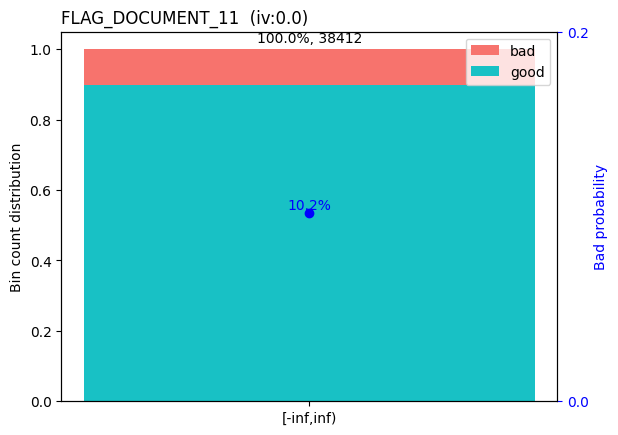

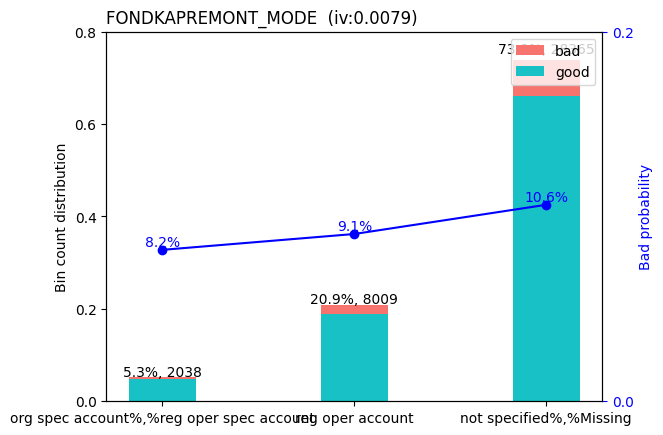

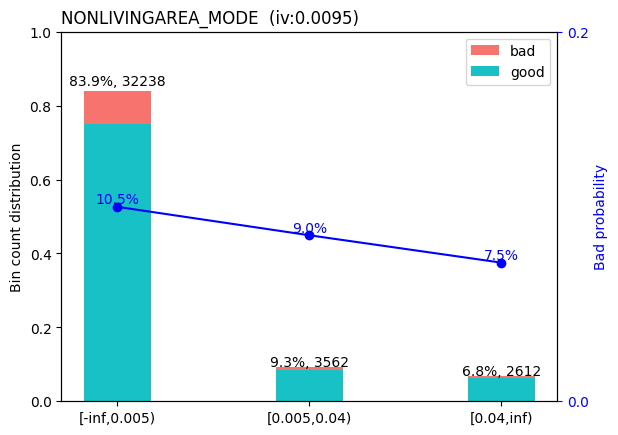

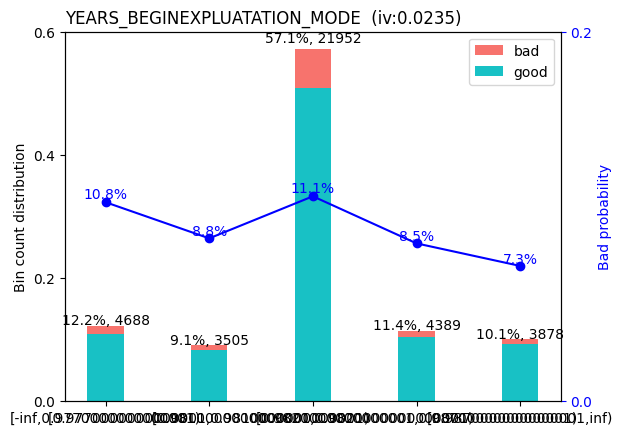

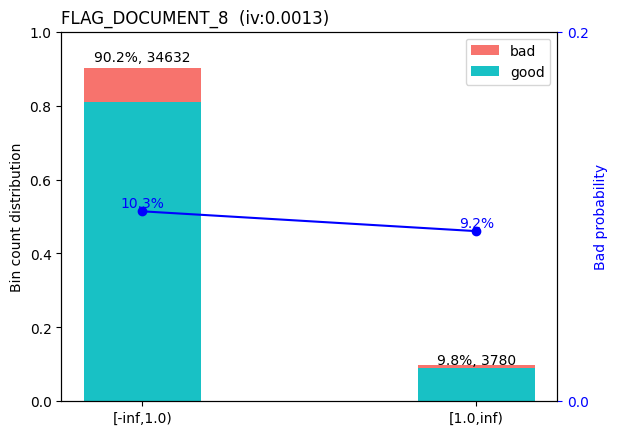

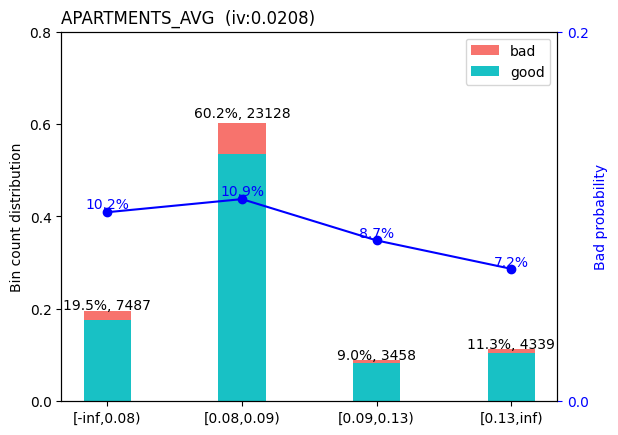

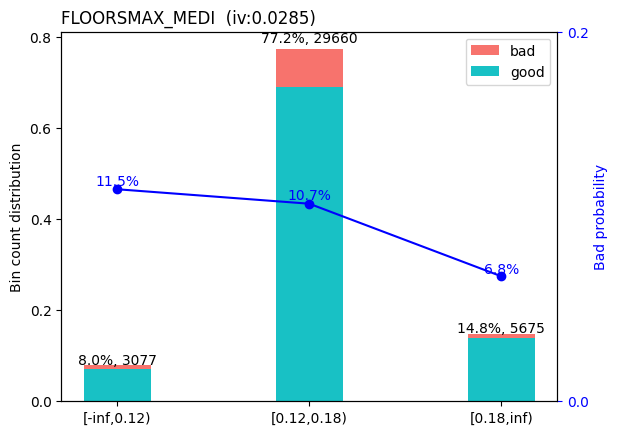

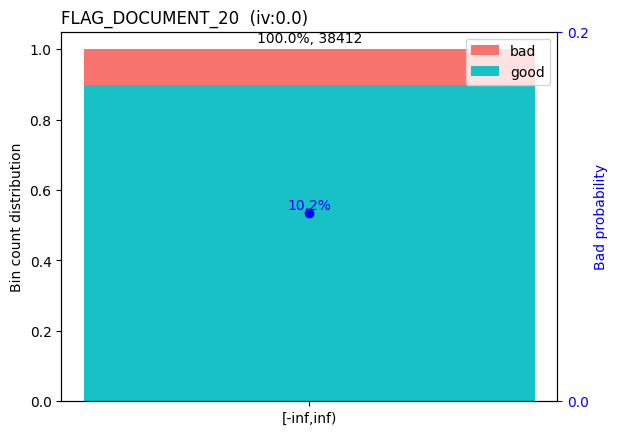

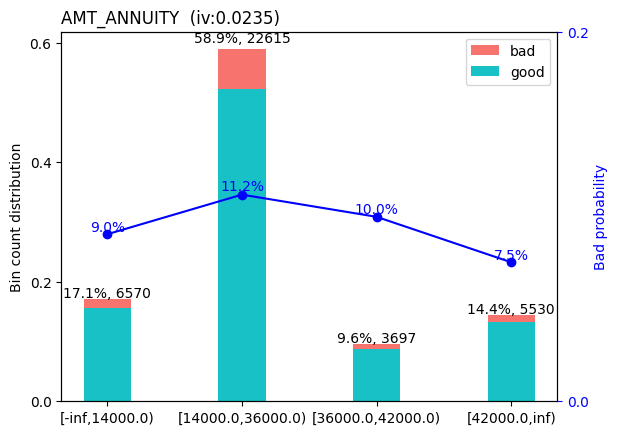

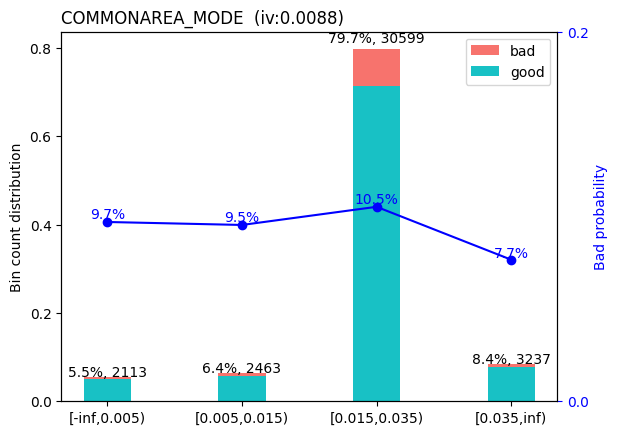

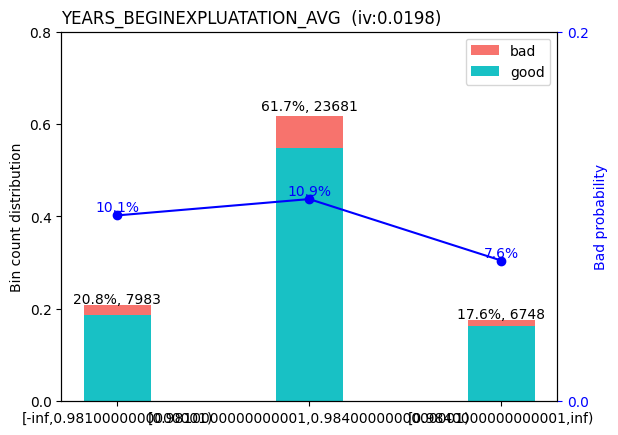

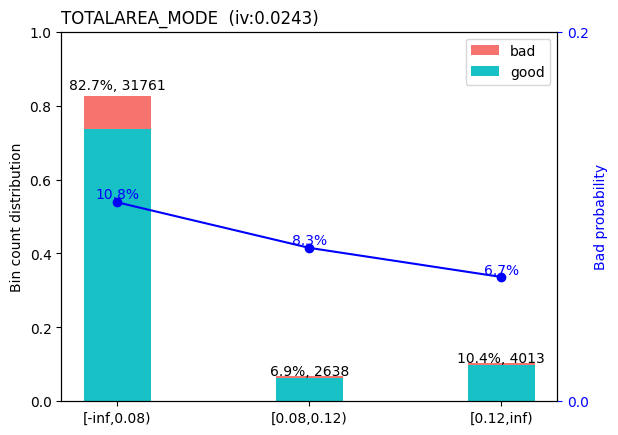

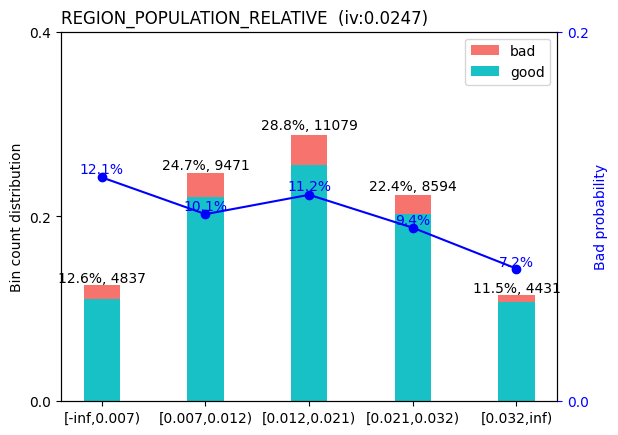

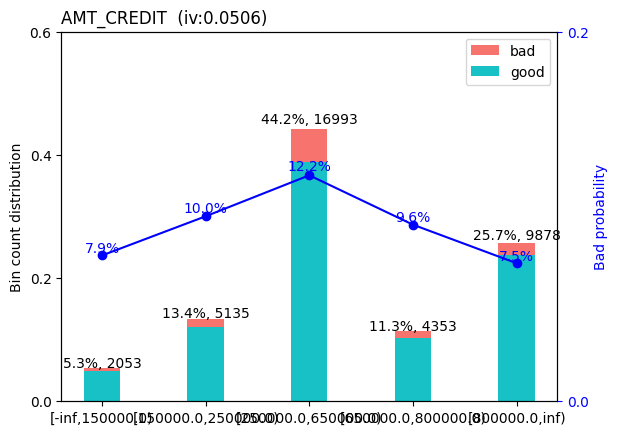

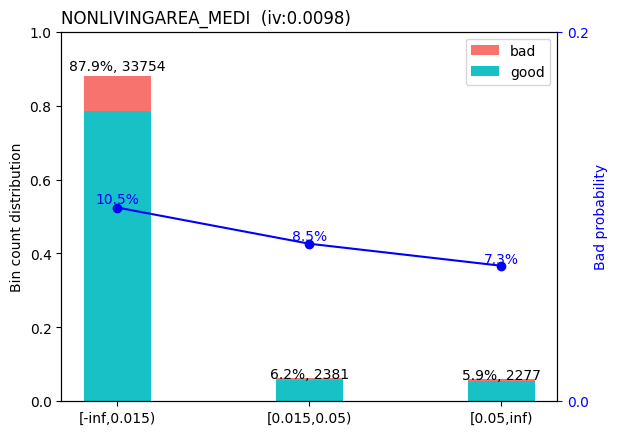

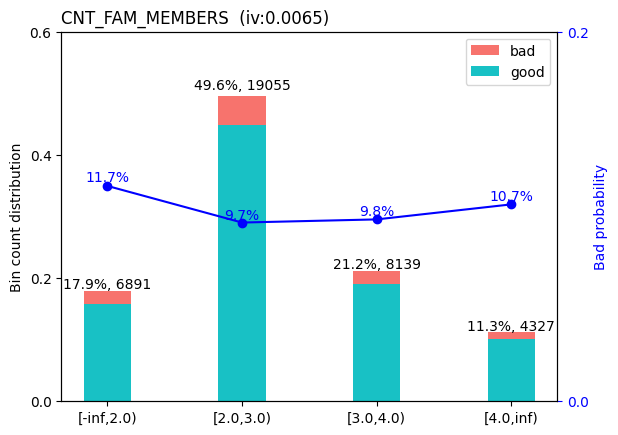

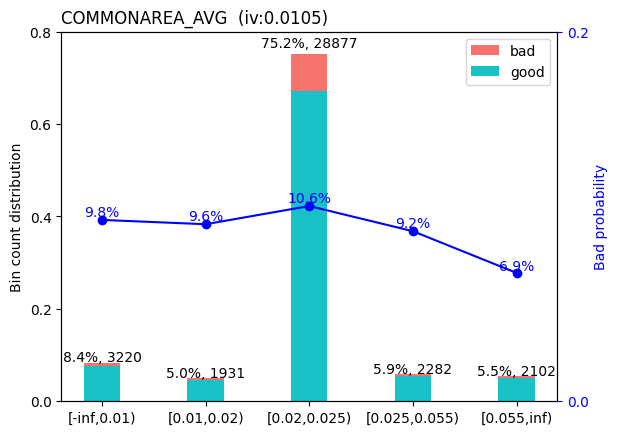

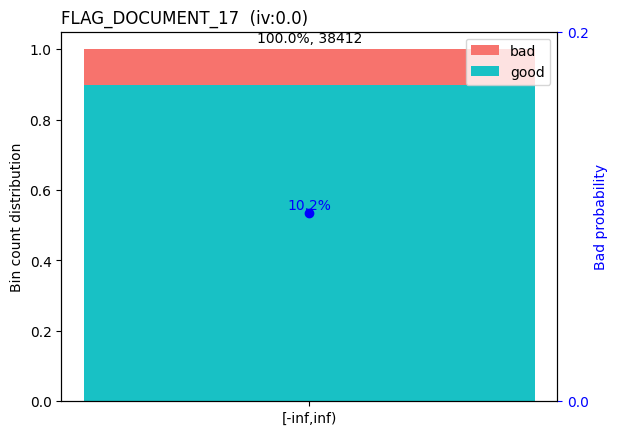

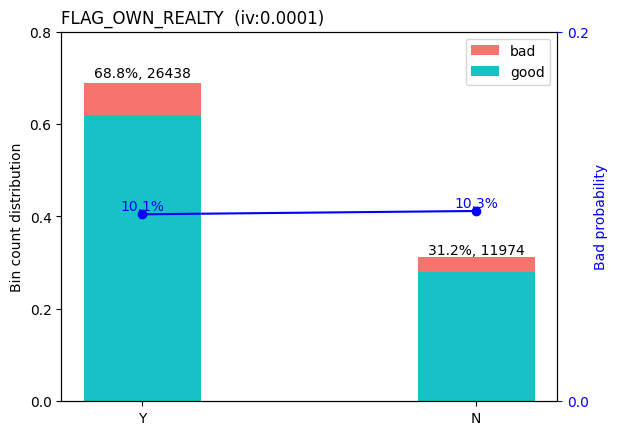

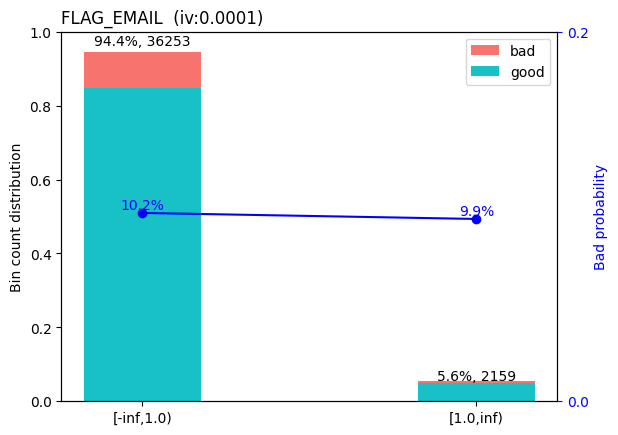

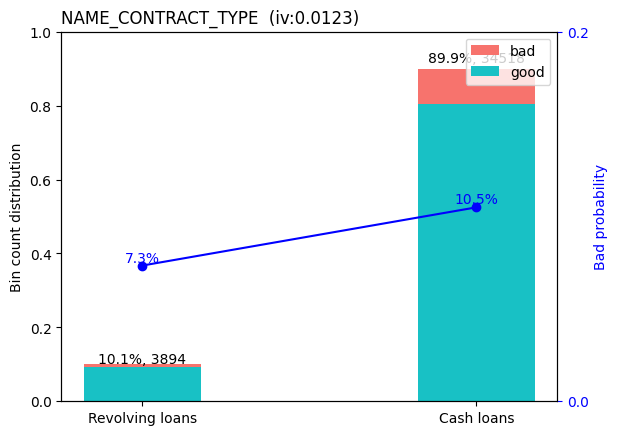

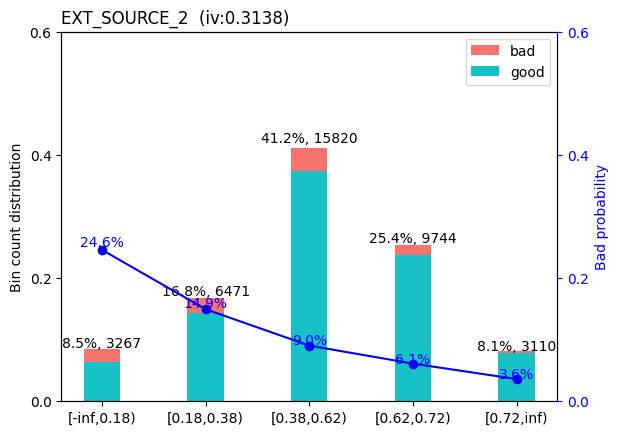

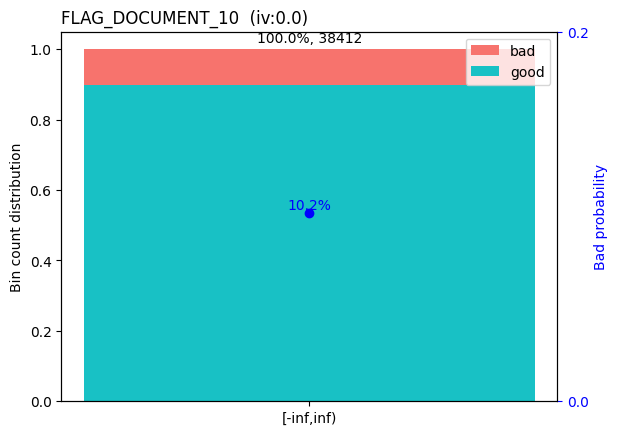

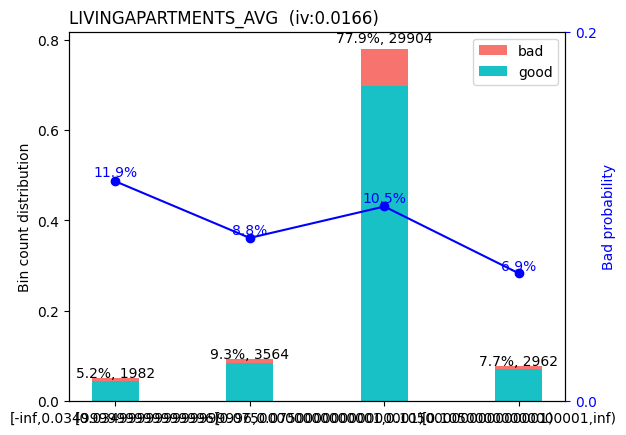

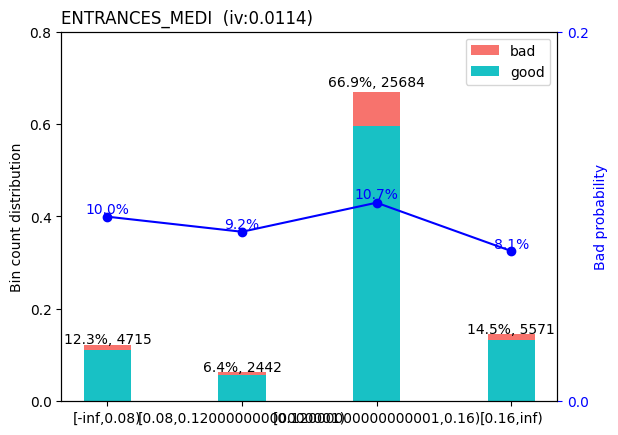

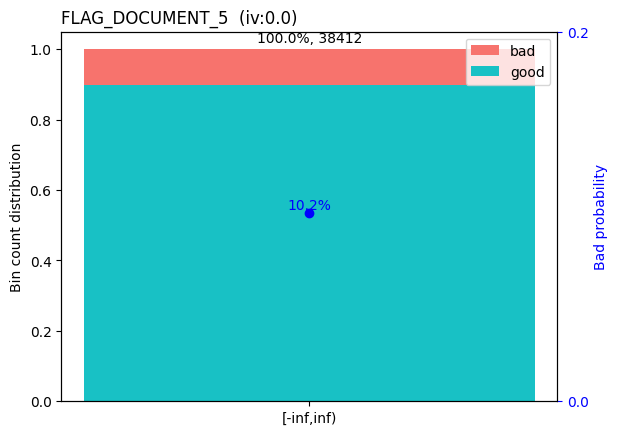

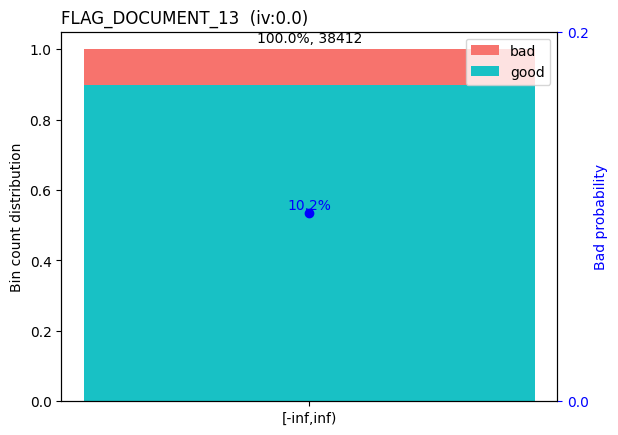

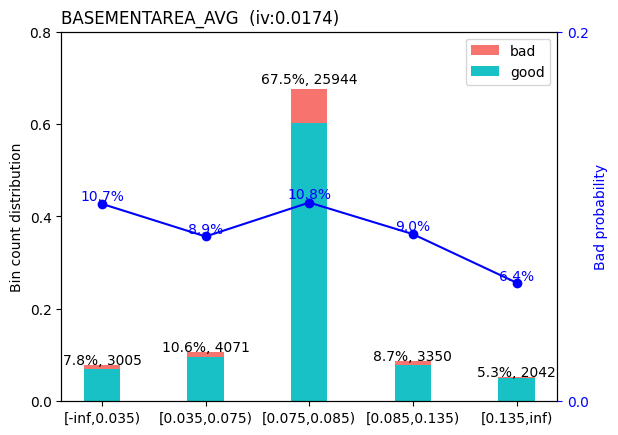

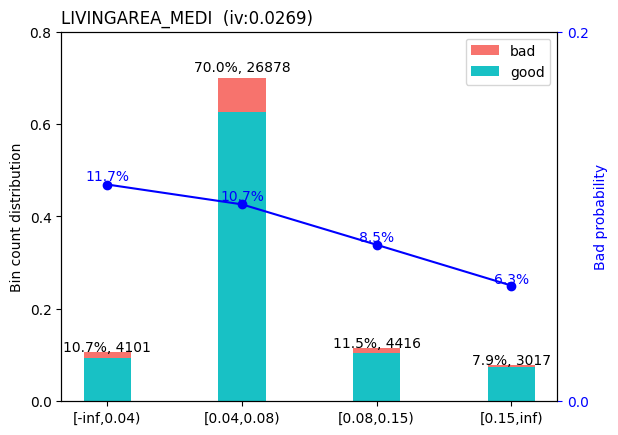

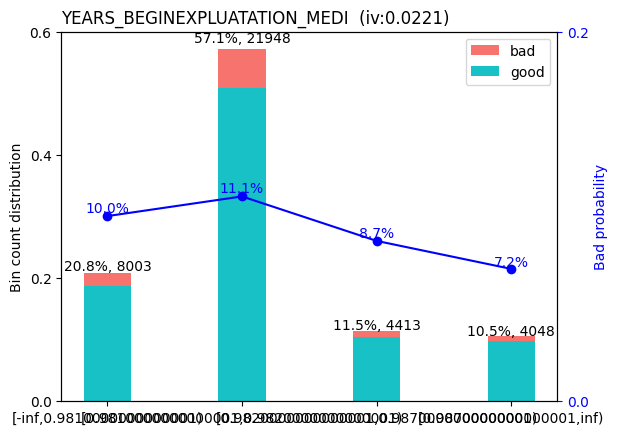

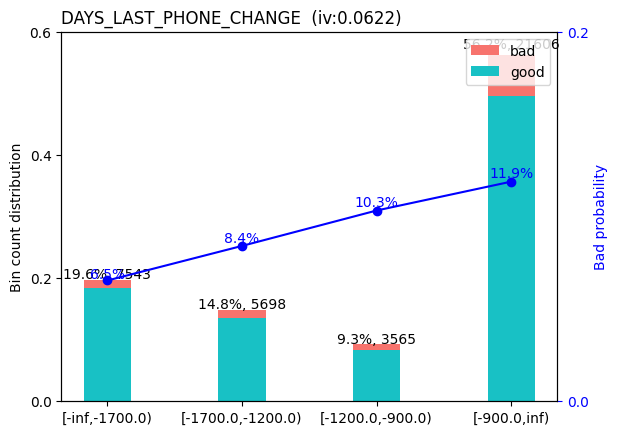

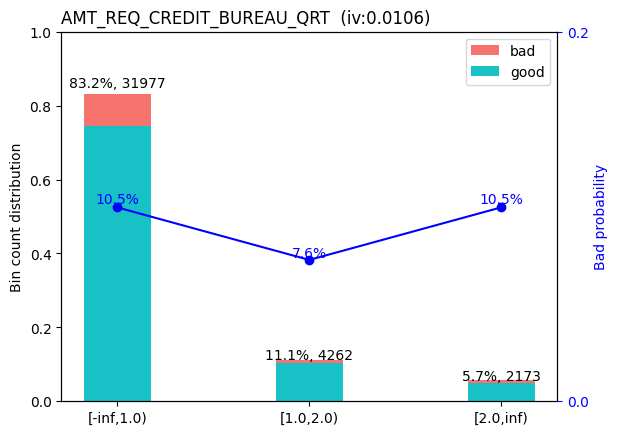

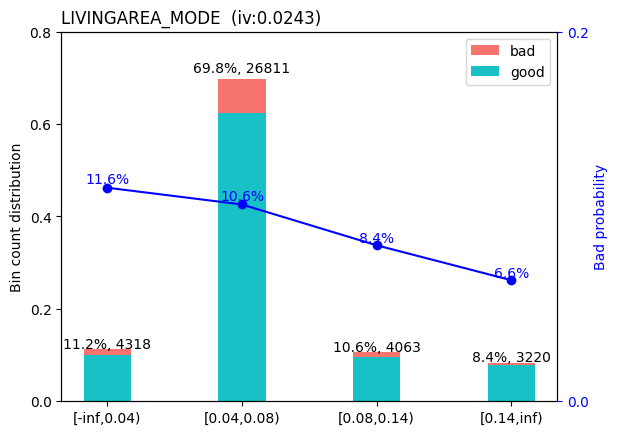

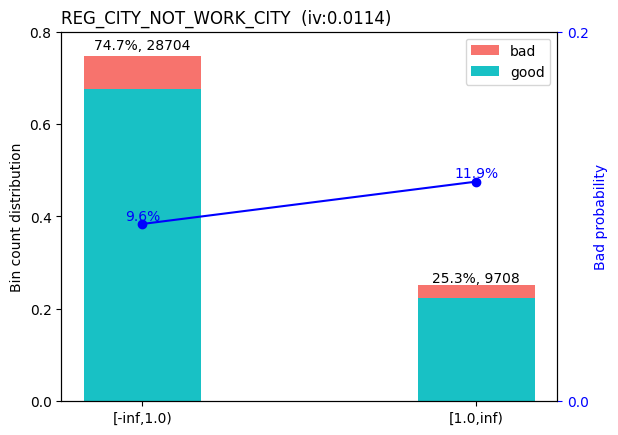

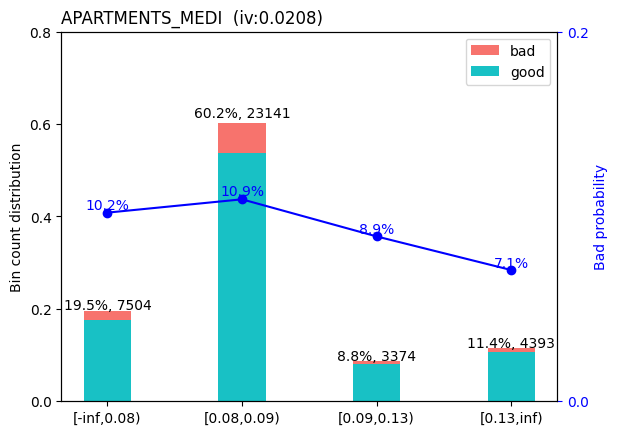

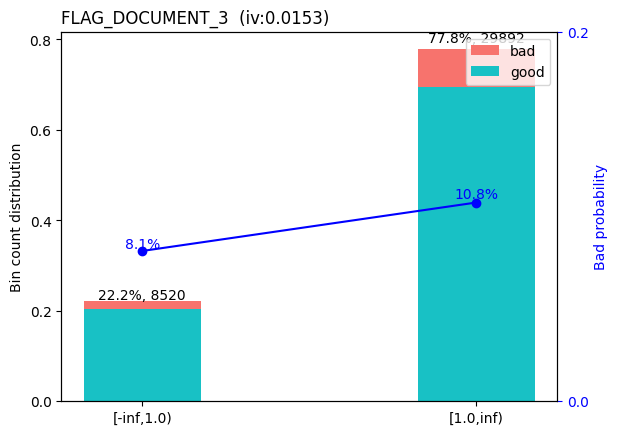

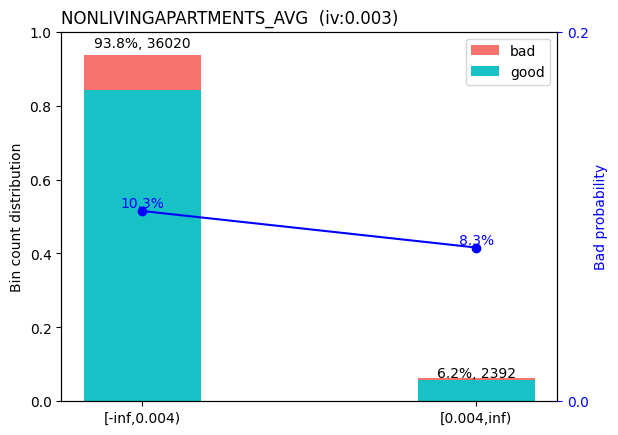

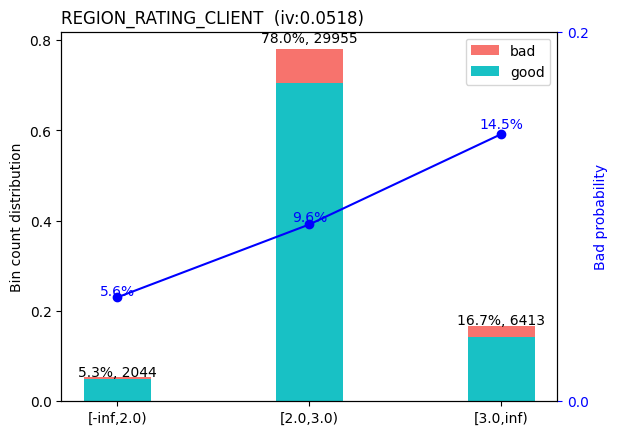

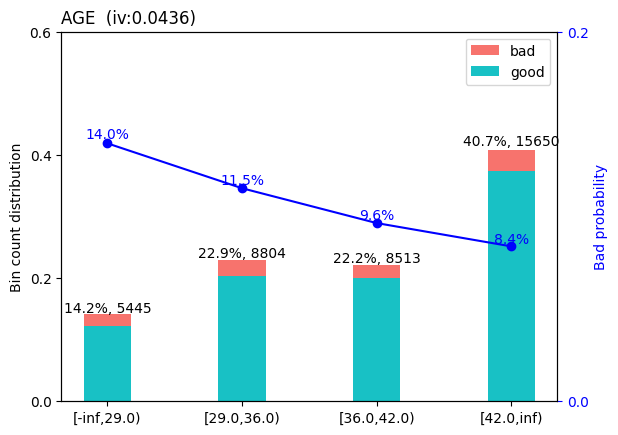

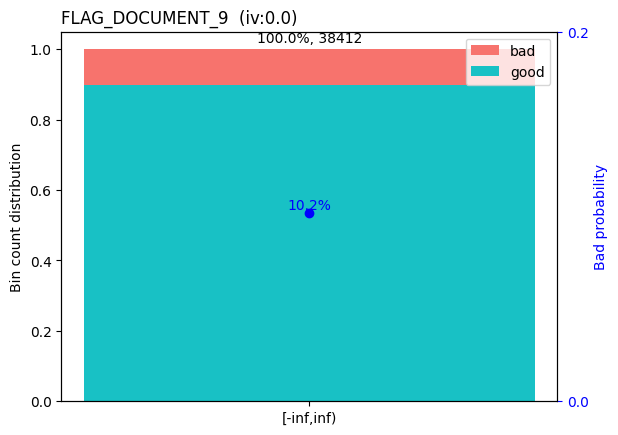

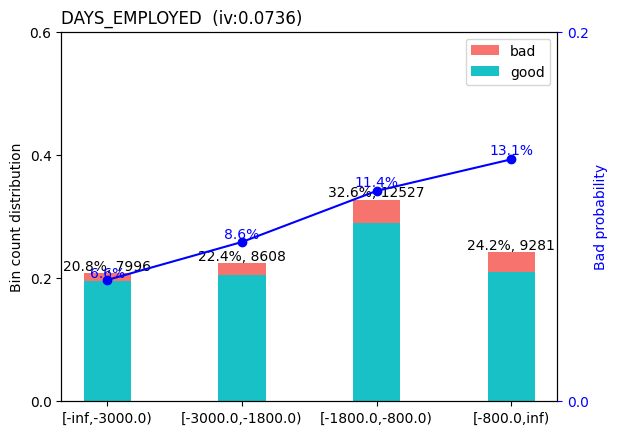

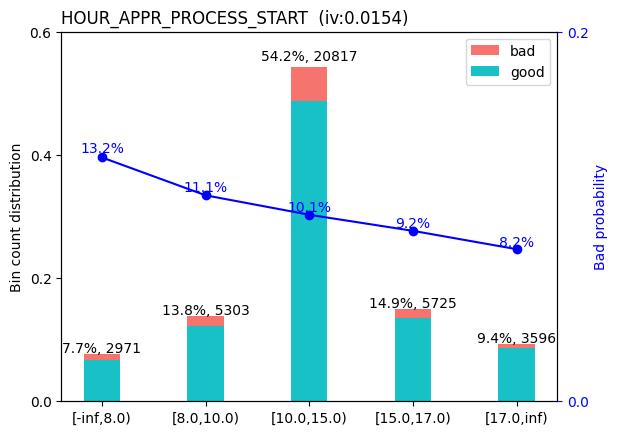

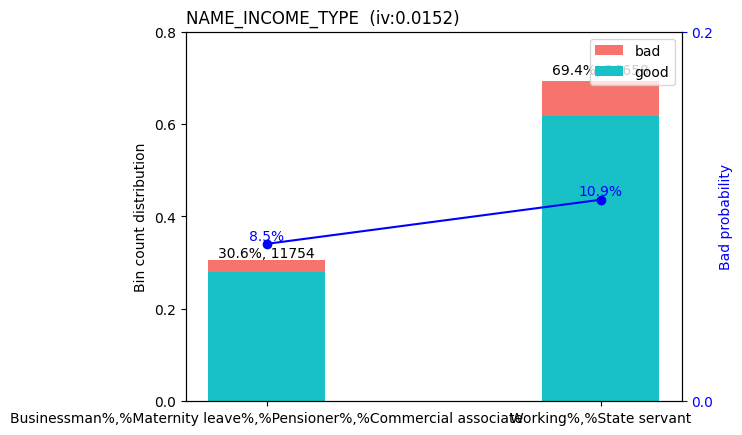

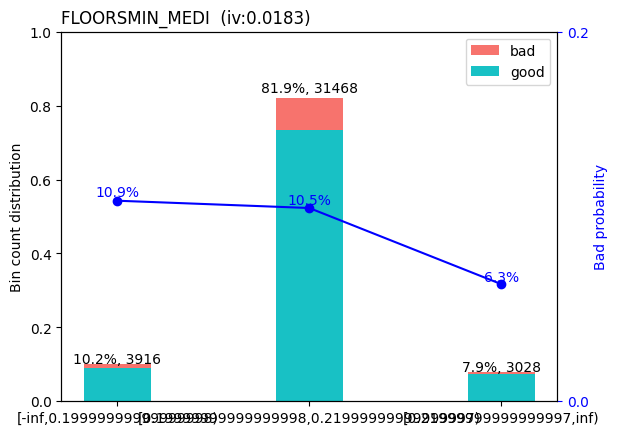

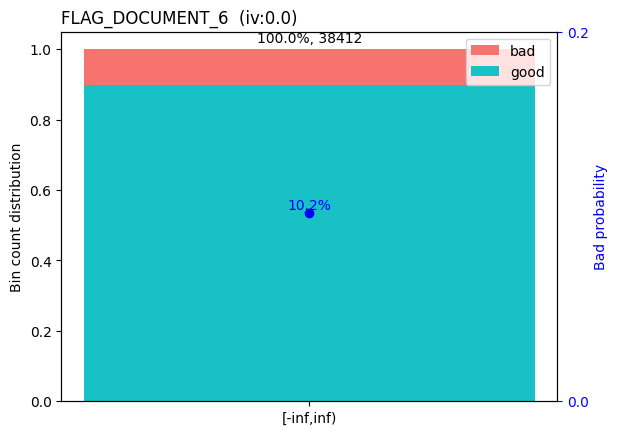

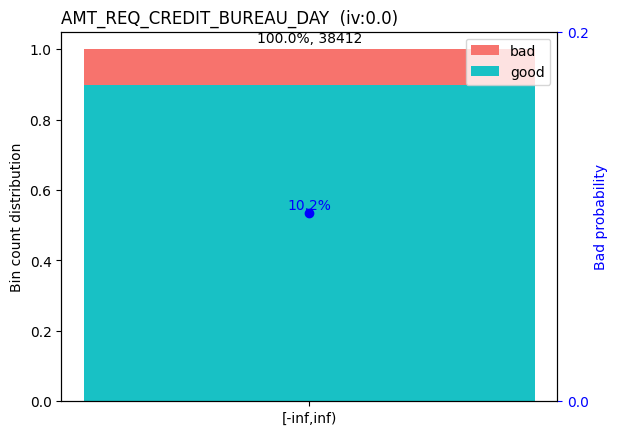

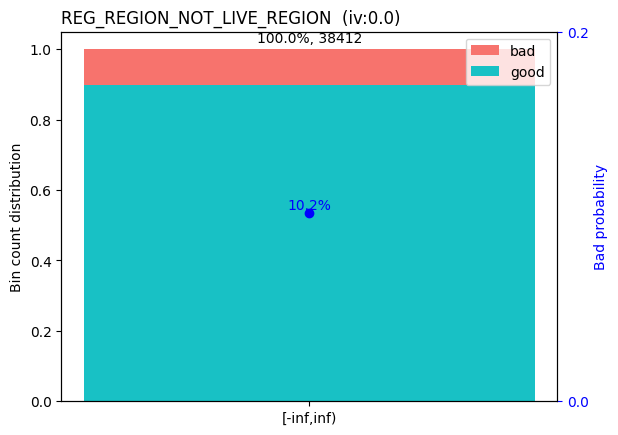

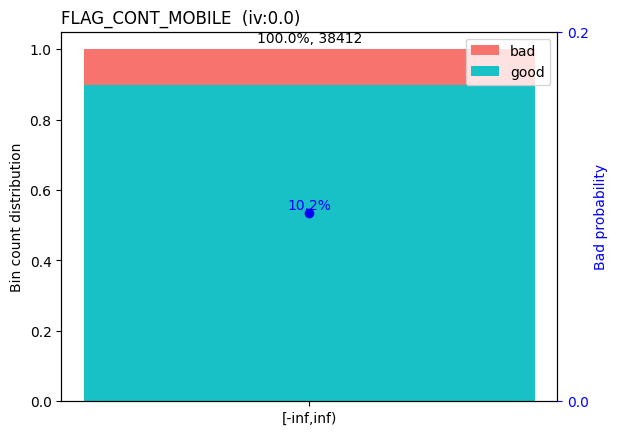

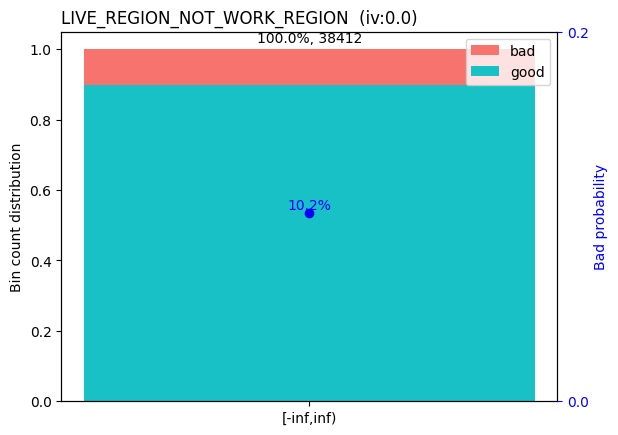

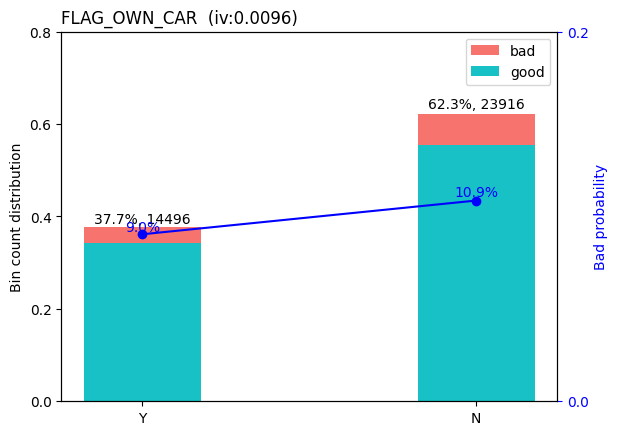

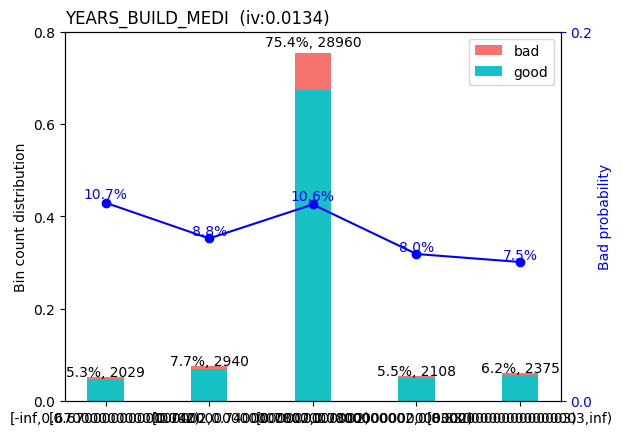

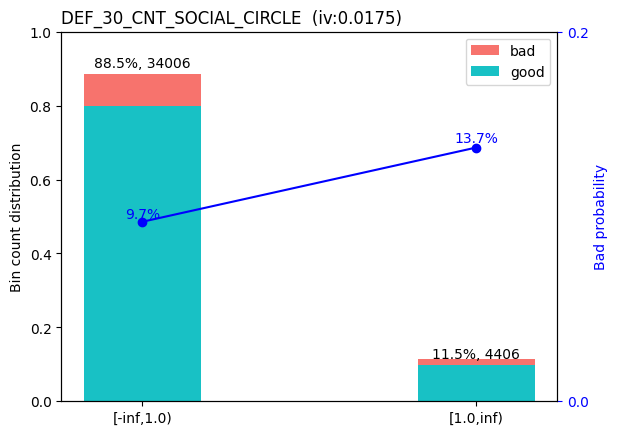

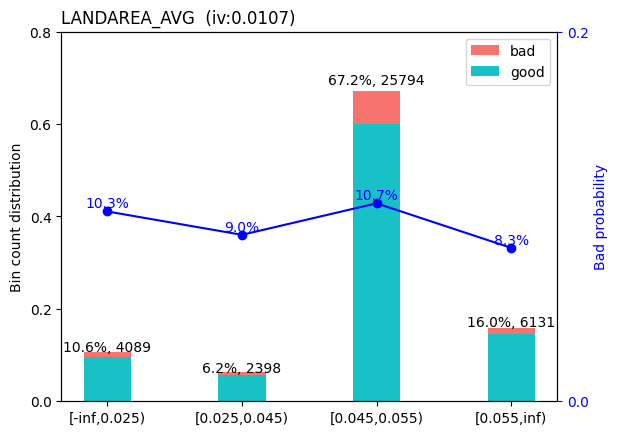

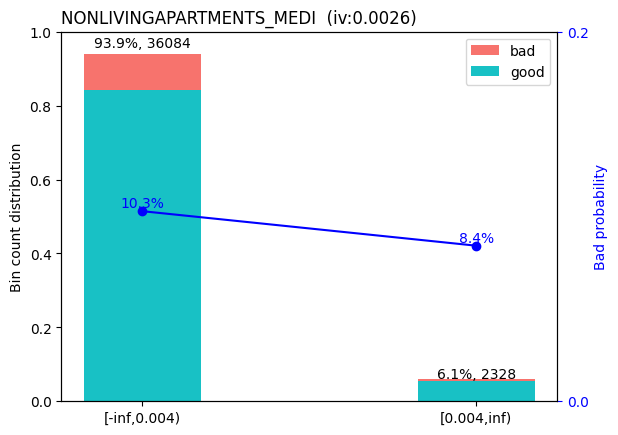

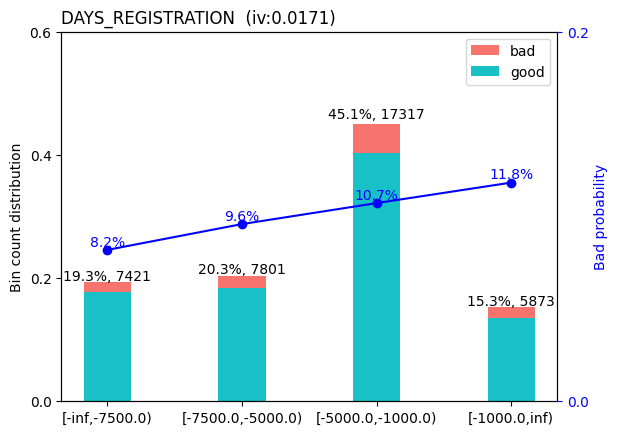

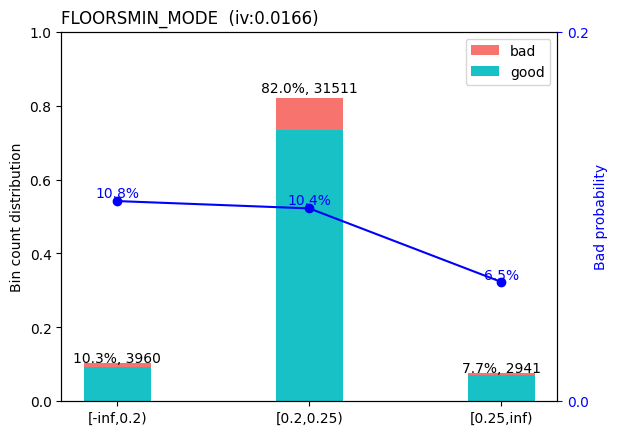

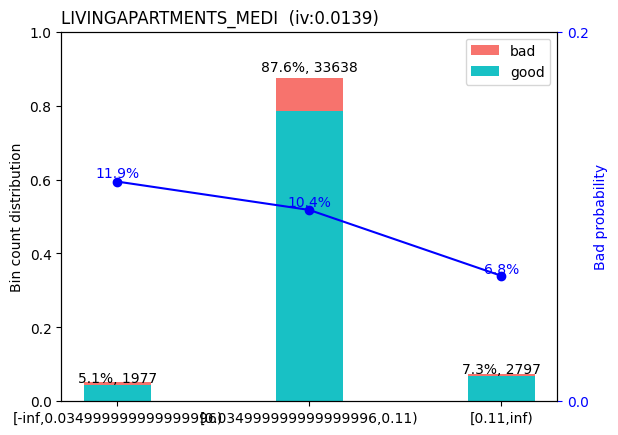

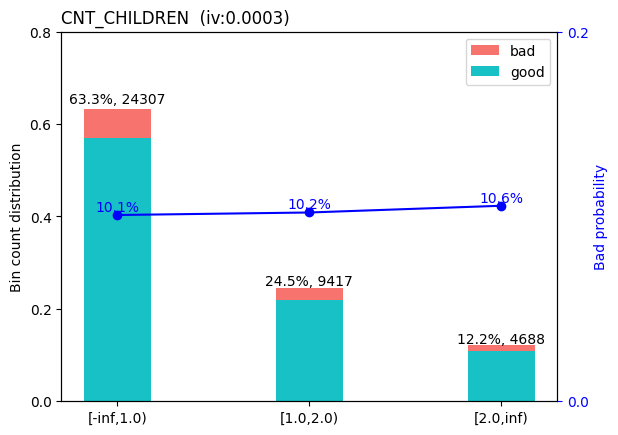

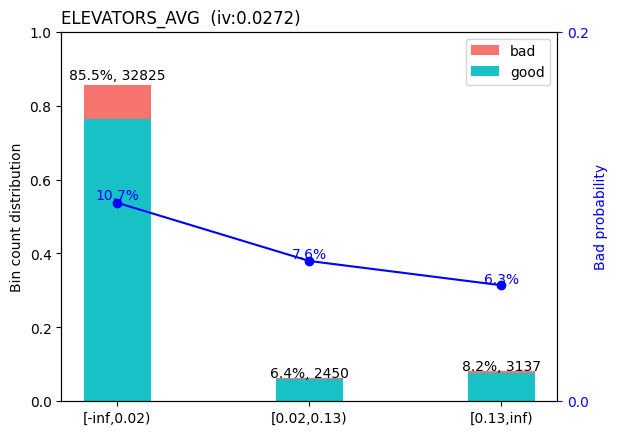

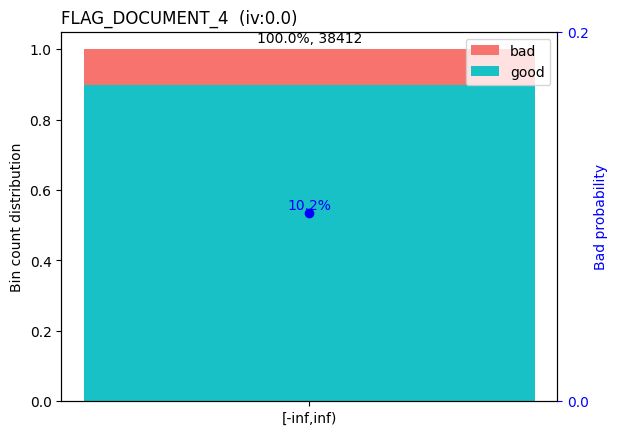

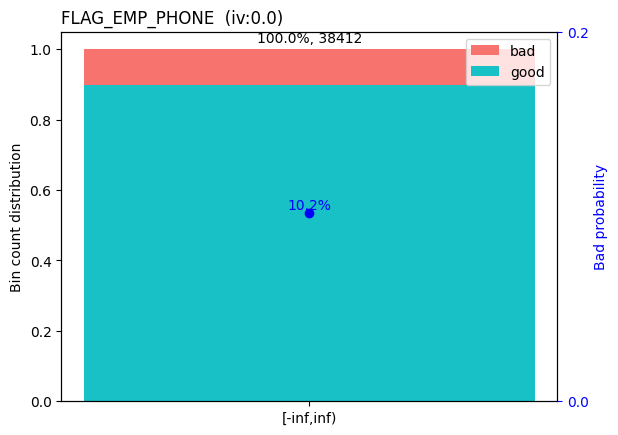

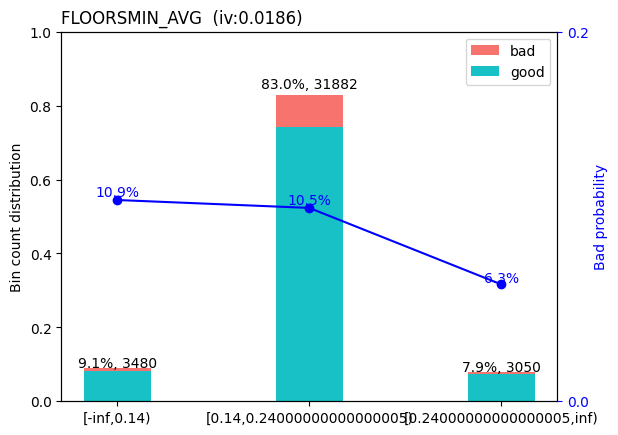

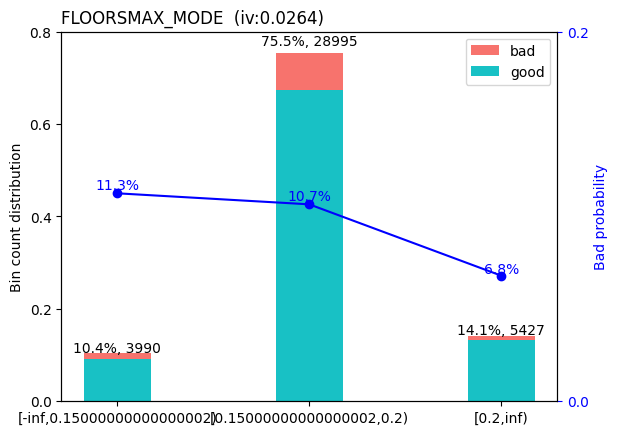

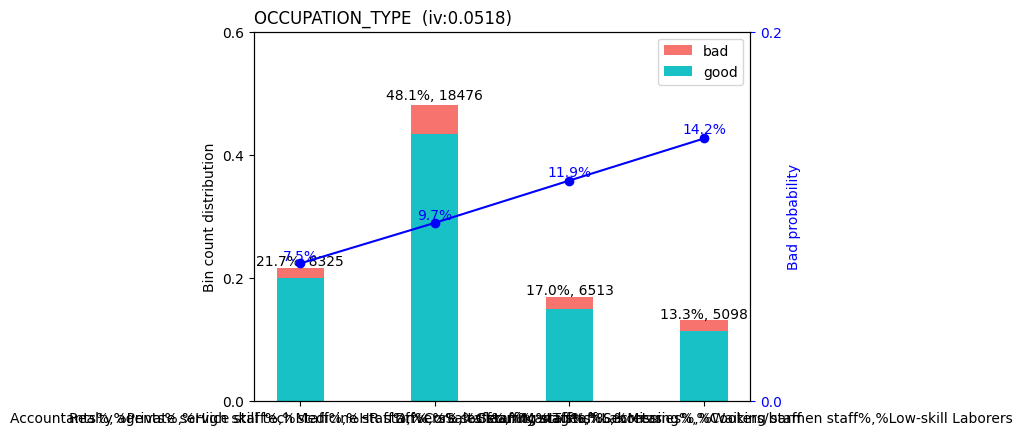

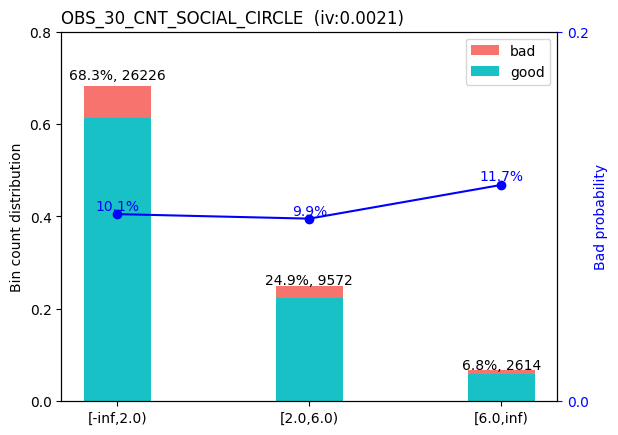

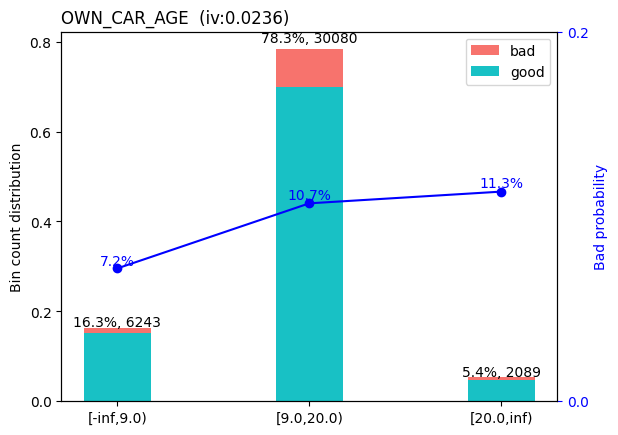

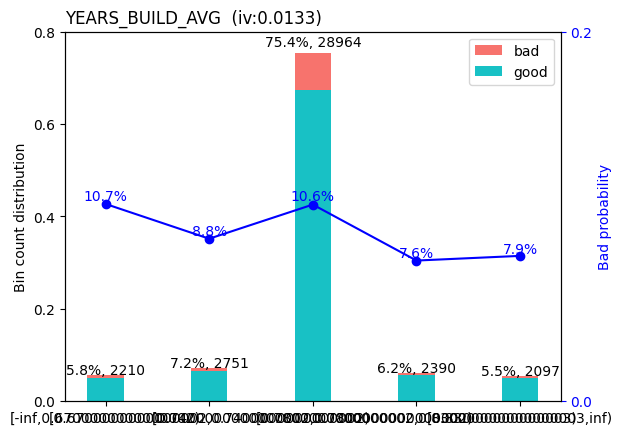

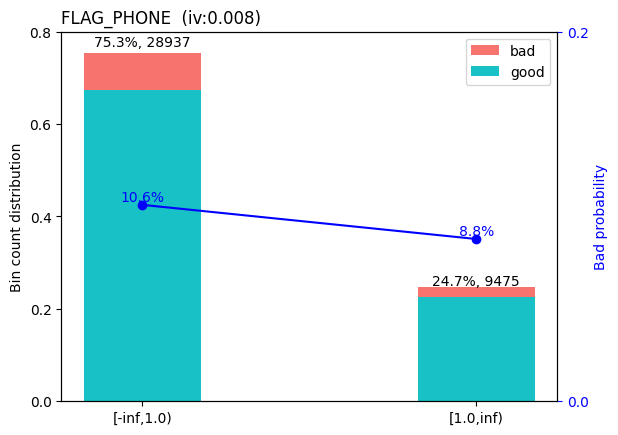

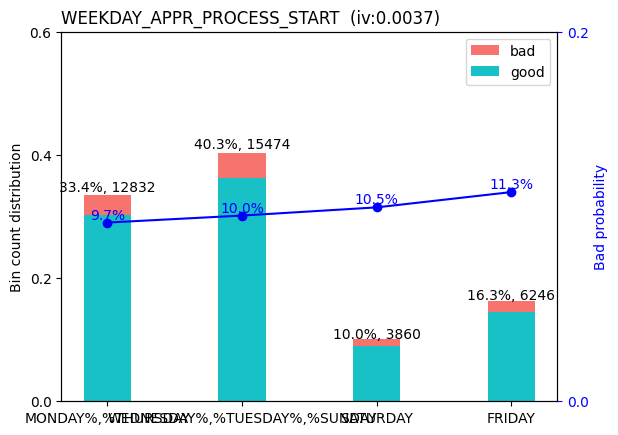

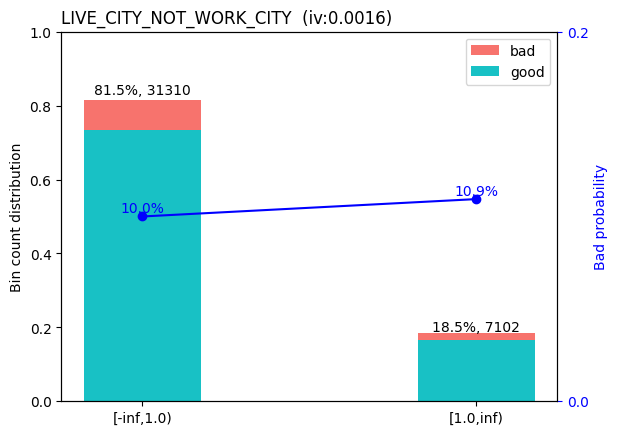

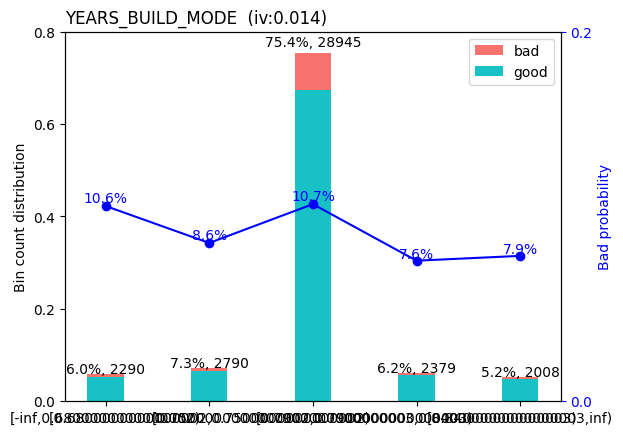

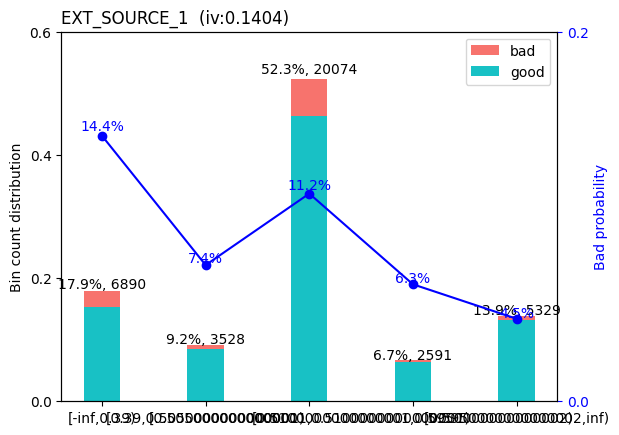

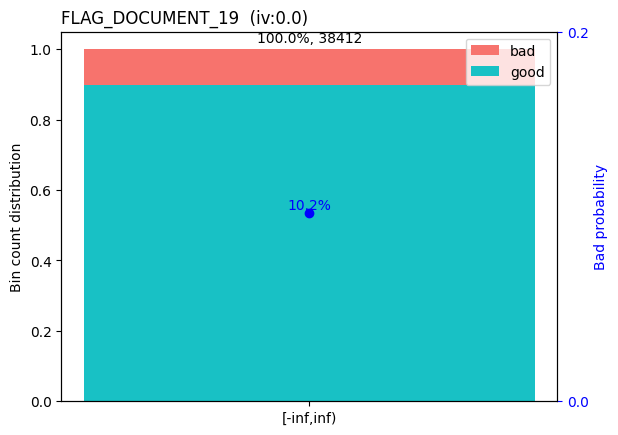

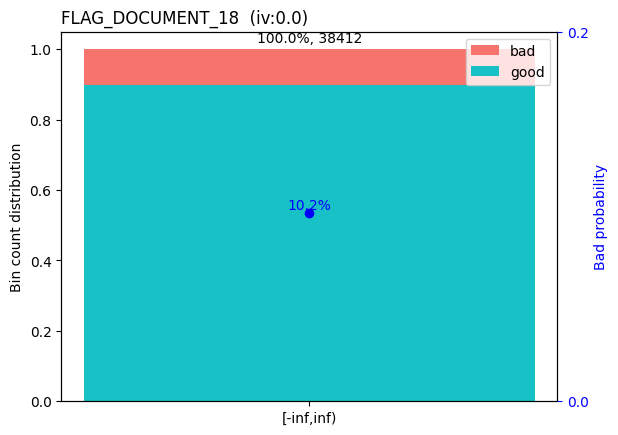

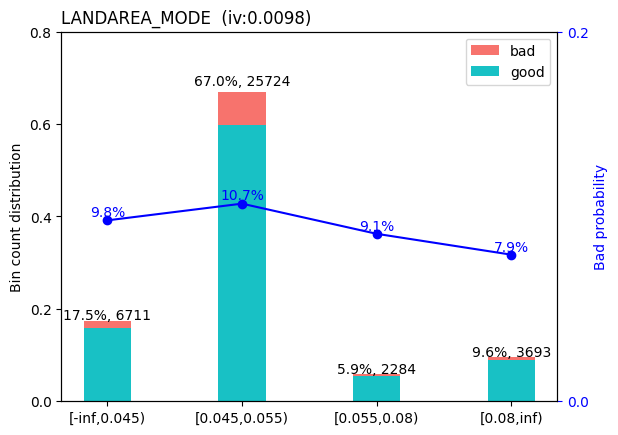

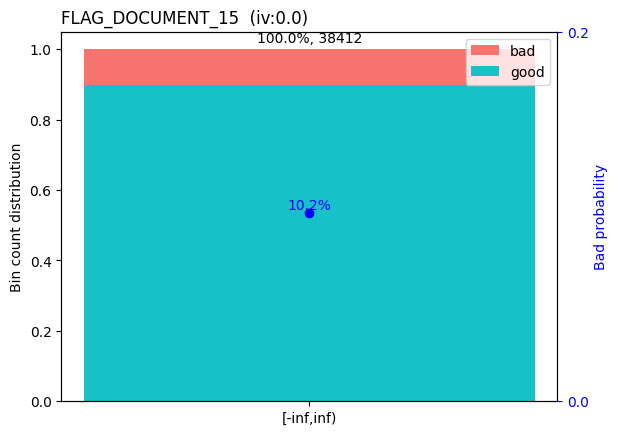

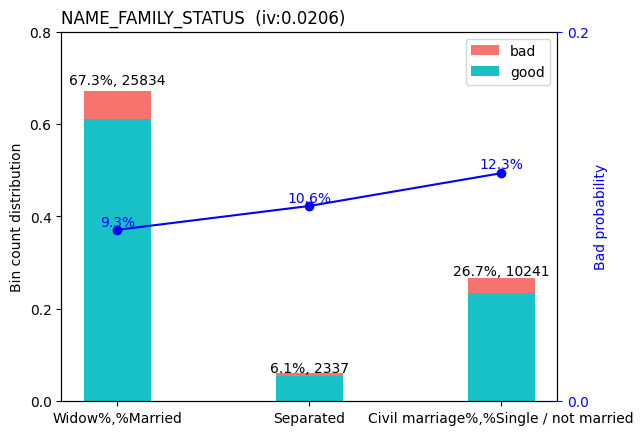

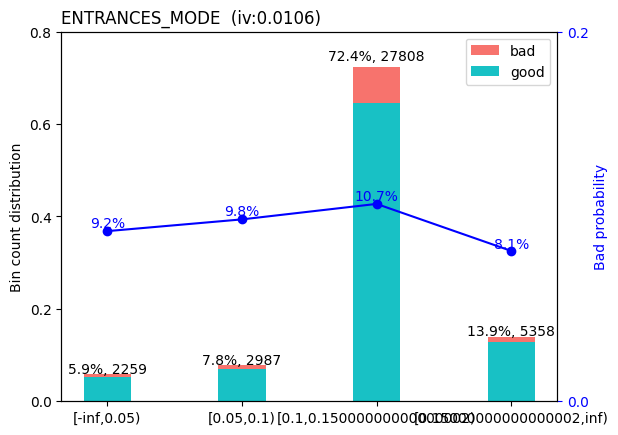

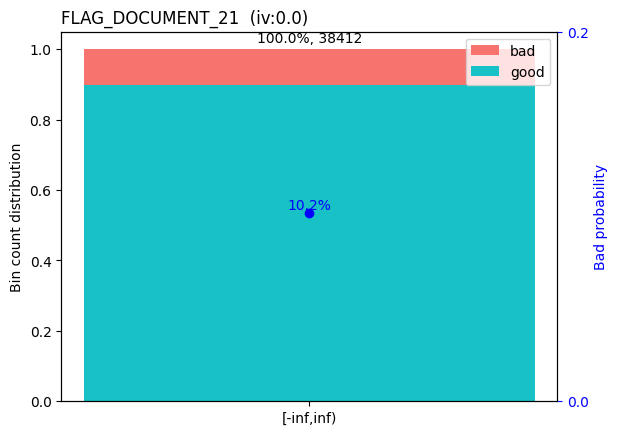

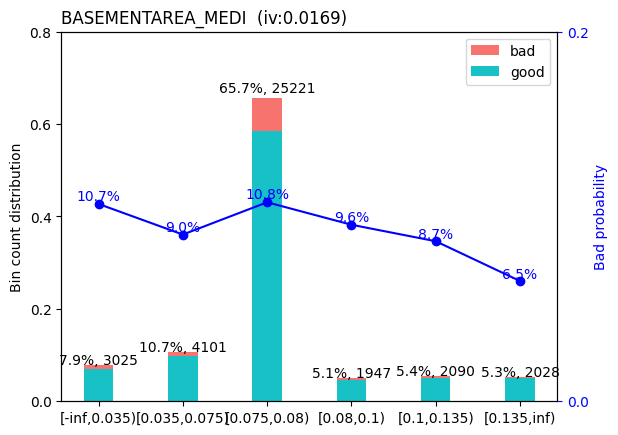

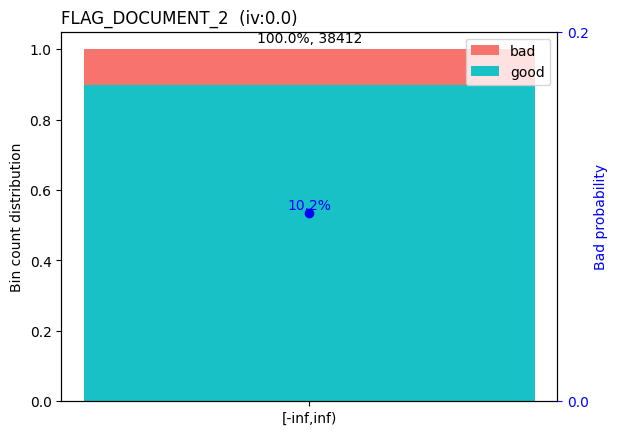

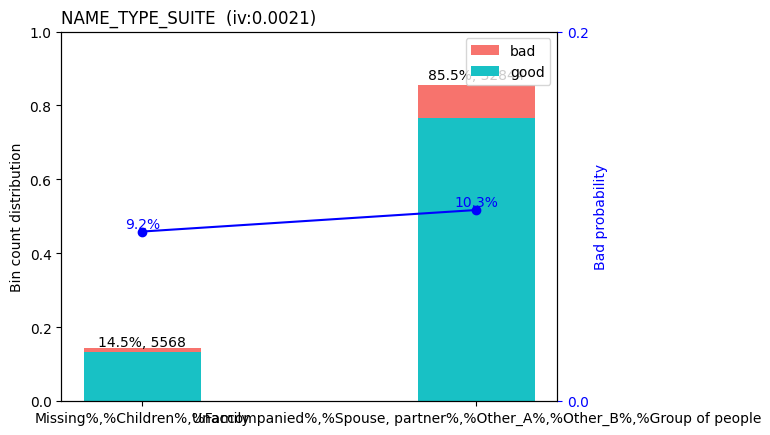

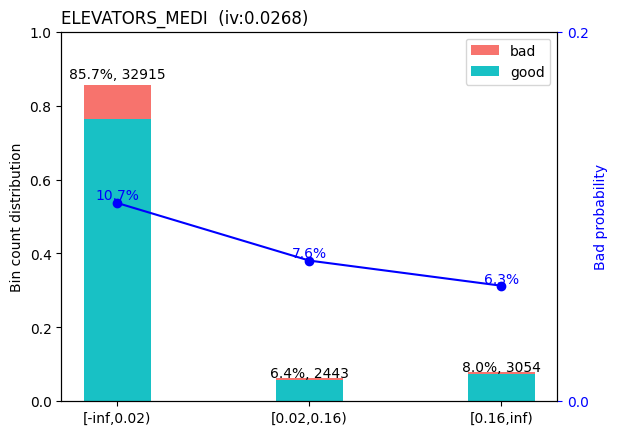

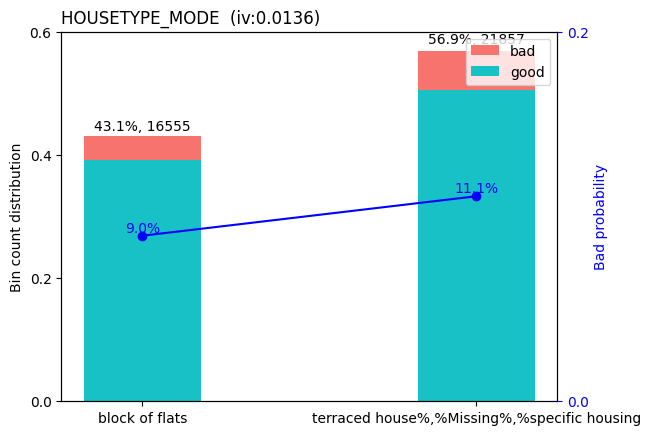

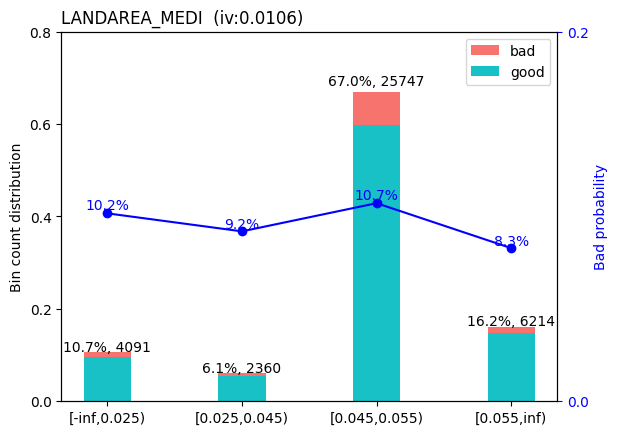

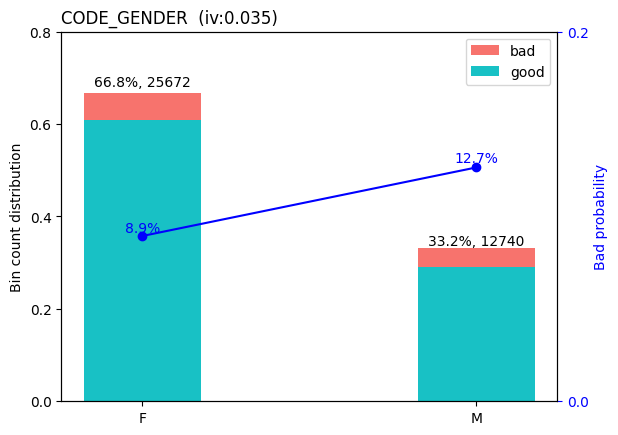

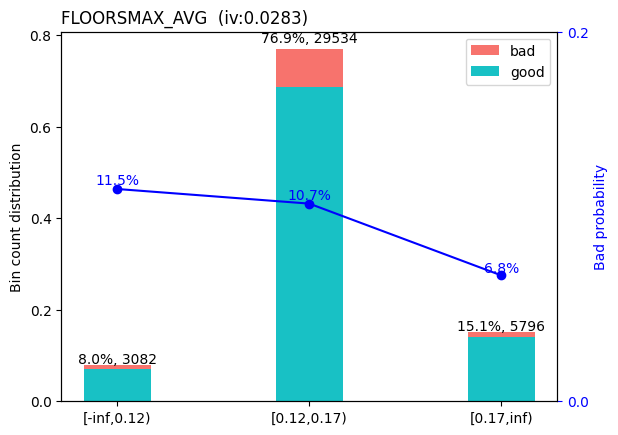

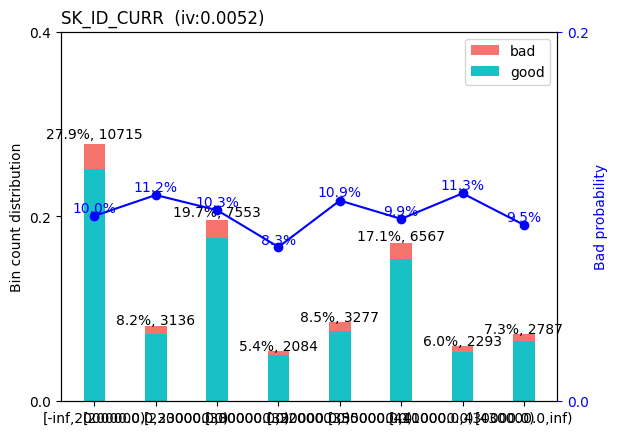

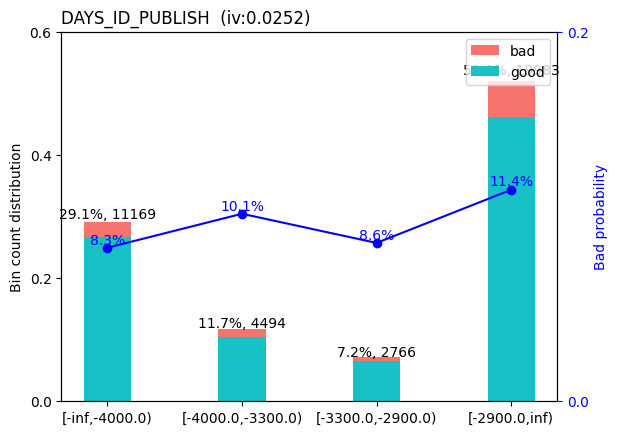

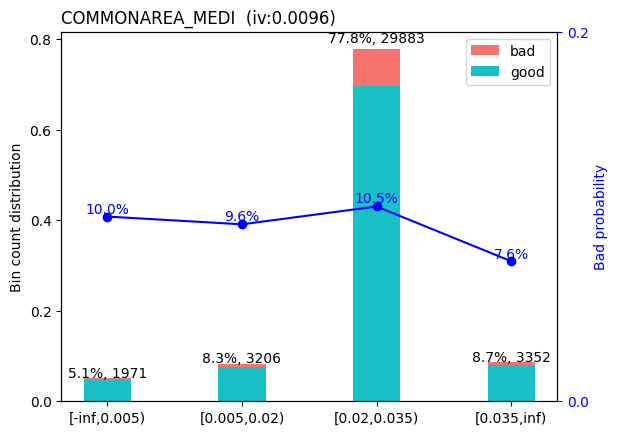

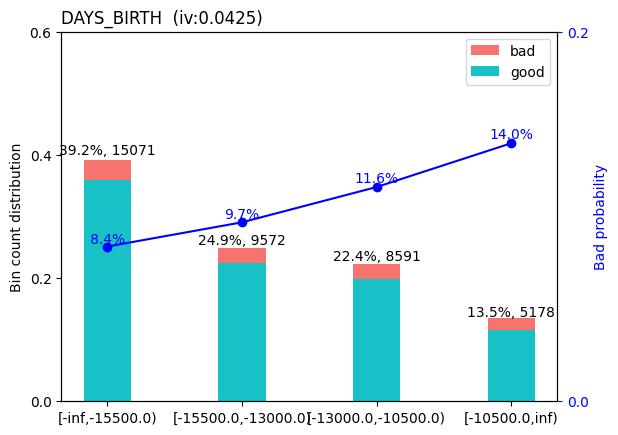

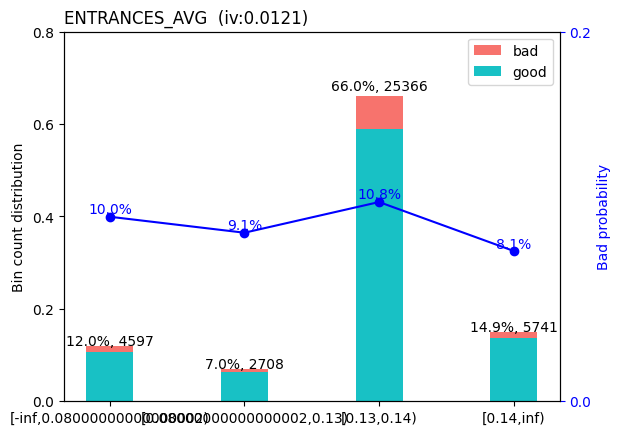

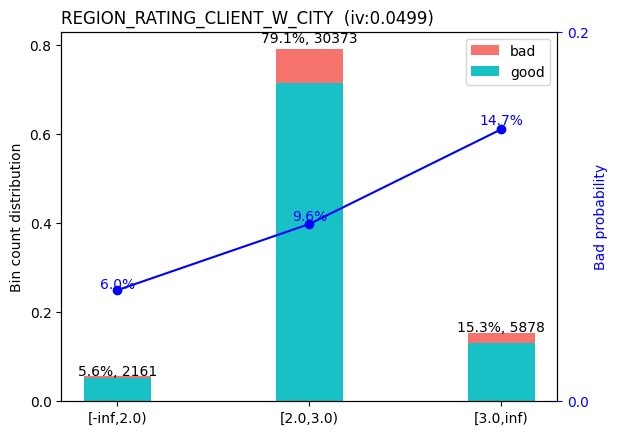

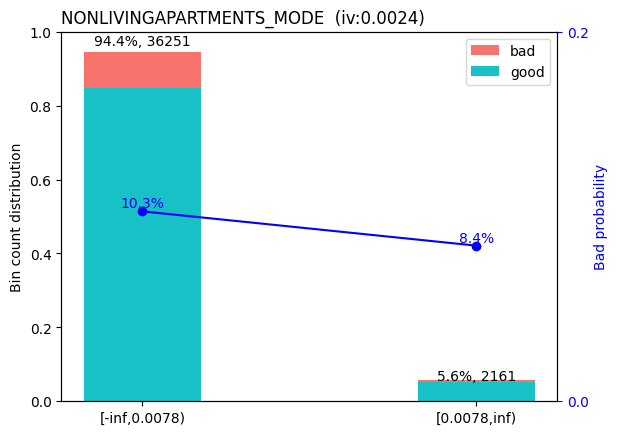

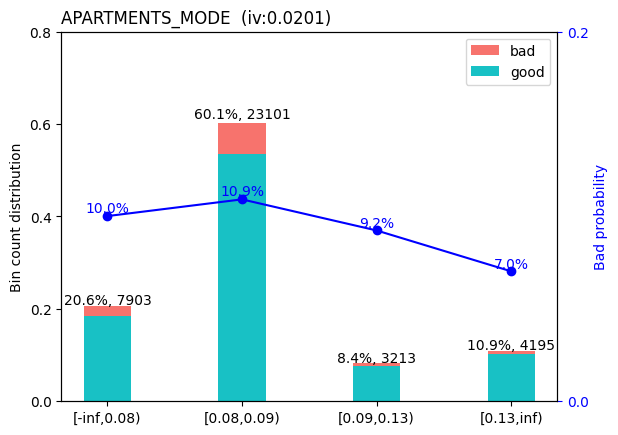

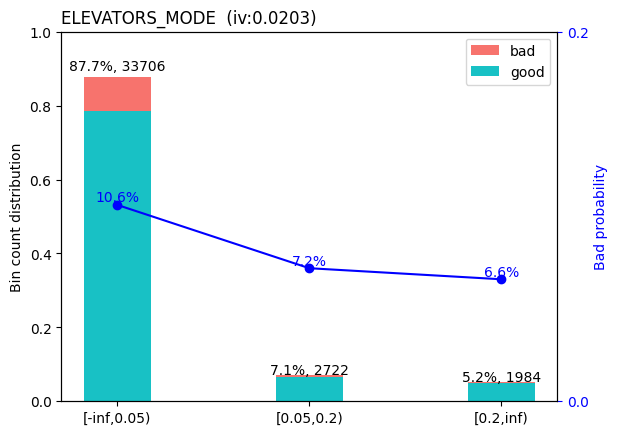

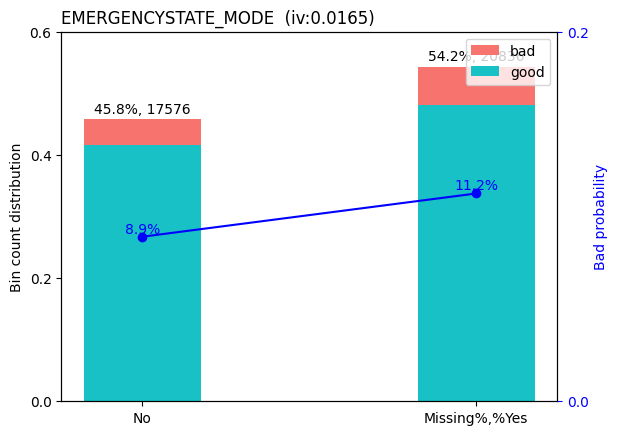

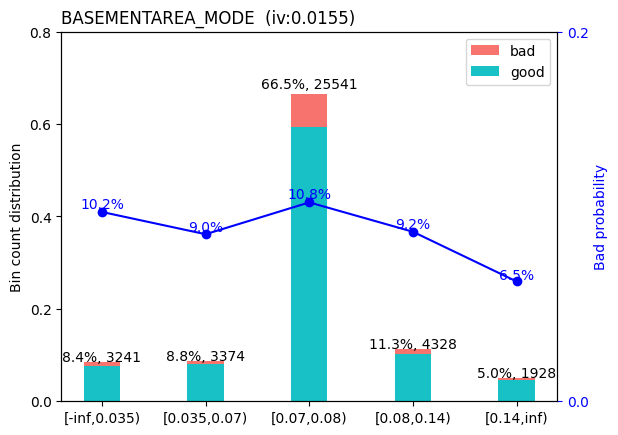

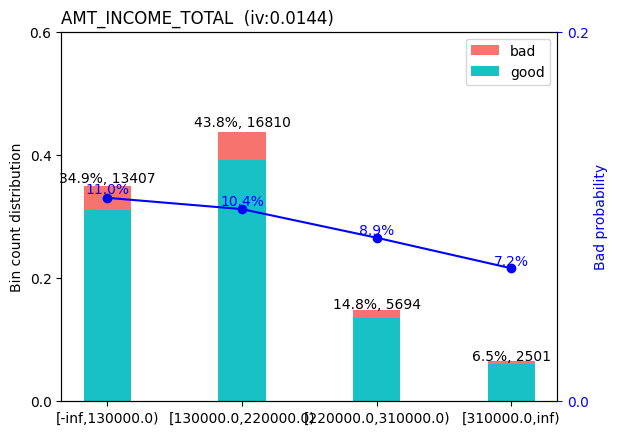

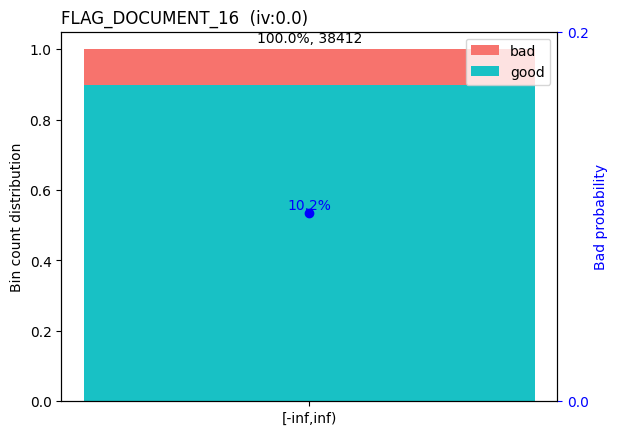

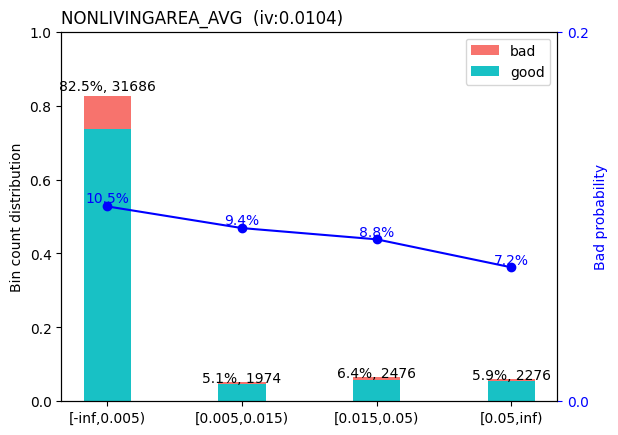

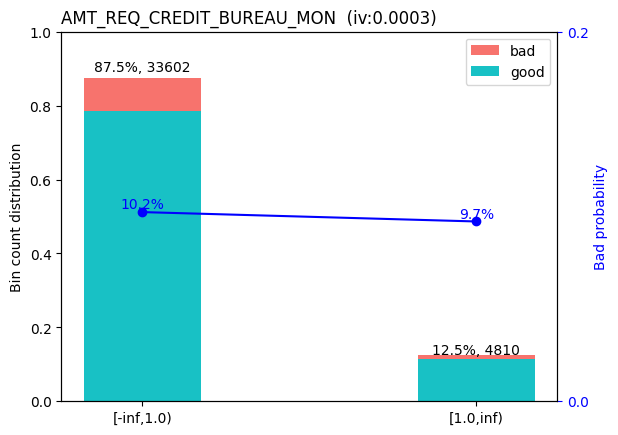

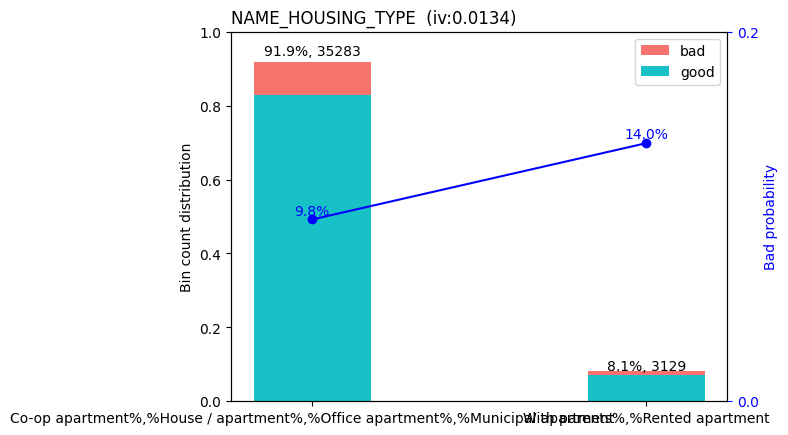

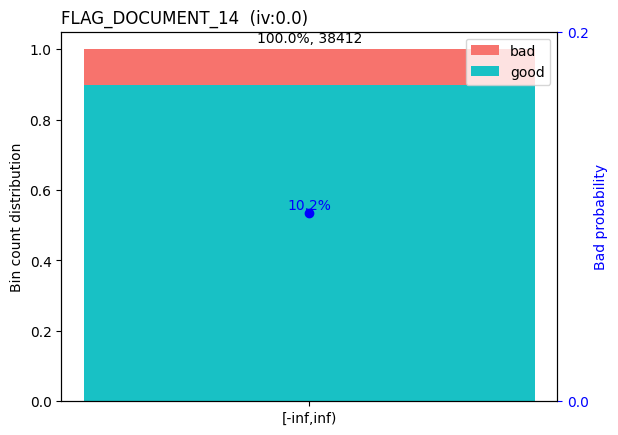

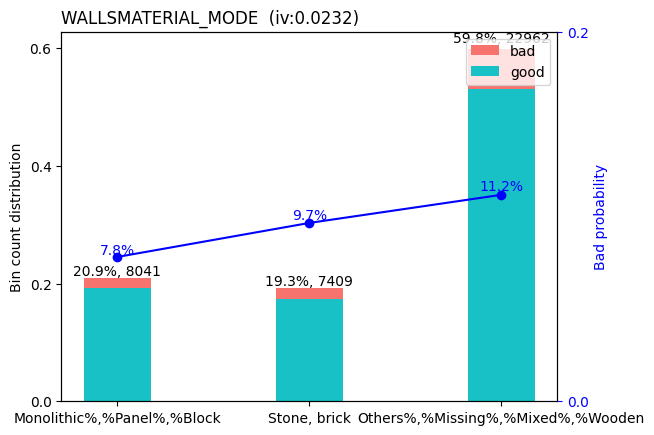

In [44]:
sc.woebin_plot(bins)

### Extract columns with IV >= 0.1